# Статистика, DS-поток
## Задание S.12

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

Практика:
* Задача P1 &mdash; 80 баллов;
* Задача P2 &mdash; 100 баллов.
* Задача P3 &mdash; 10 баллов;
* Задача P4 &mdash; 80 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи P2, P3;
* *обычная:* задача P1, P4.

In [1]:
# Bot check

# HW_ID: ds_sp12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.datasets as smd

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.3, palette='Set2')

---
### Задача P1.

Галапагосские острова &mdash; группа островов вулканического происхождения на востоке экваториальной части Тихого океана, в 972 км к западу от Эквадора, состоящая из 13 основных вулканических островов, 6 небольших островов и 107 скал и намывных территорий.

Острова известны прежде всего большим количеством местных видов фауны и проведённым здесь исследованием Чарлза Дарвина, которое послужило для него первым толчком к созданию эволюционной теории происхождения видов.


Загрузите датасет `galapagos.csv`, в котором содержатся данные об островах на Галапагосском архипелаге:
* `island` &mdash; наименование острова;
* `species` &mdash; количество наблюдаемых видов растений на острове;
* `endemics` &mdash; количество уникальных видов [*в задаче не рассматриваем*];
* `area` &mdash; площадь (км^2);
* `elevation` &mdash; высота (м);
* `nearest` &mdash; расстояние до ближайшего острова (км);
* `scruz` &mdash; расстояние до самого крупного острова архипелага Санта-Крус (км);
* `adjacent` &mdash; площадь соседнего острова (км^2).

Считаем данные и выкидываем `endemics` по условию выше; `island` в обучении использовать тоже нельзя - это уникальная метка острова

In [3]:
galapagos = pd.read_csv('galapagos.csv', sep=';')
galapagos = galapagos.drop(["endemics"], axis=1)
galapagos.head()

,island,species,area,elevation,nearest,scruz,adjacent
0,Baltra,58,25.09,332,0.6,0.600000,1.840000
1,Bartolome,31,1.24,109,0.6,26.299999,572.330017
2,Caldwell,3,0.21,114,2.8,58.700001,0.780000
3,Champion,25,0.10,46,1.9,47.400002,0.180000
4,Coamano,2,1.05,130,1.9,1.900000,903.820007


Рассмотрим пуассоновскую регрессию. Какая ожидается зависимость `species` от остальных признаков?

Переменная $y = $`species`

$$\large g(t) = \log t, \mu_\theta(x) = \exp(x^T \theta)$$

Ожидаемый отклик $\large{y = \mu_\theta(x)}$, где $\large{g(\mu_\theta(x))=x^T\theta}$, 

Наблюдаемый отклик $\large{Y_i \sim Pois_{\mu_\theta(x_i)}}$.

Оценка ожидаемого отклика $\large{\widehat{y}} = g^{-1}\left(x^T\widehat{\theta}\right) = \exp(x^T \theta)$.

То есть зависимость экспоненциальная, а логарифма - линейная

Постройте графики зависимости `species` от всех признаков. При необходимости выполните нелинейные преобразования некоторых их них.

Пустых значений нет

In [4]:
galapagos.isnull().values.any()

False

Мы ожидаем что зависимость логарифма `special` от таргетов линейна. Это и проверим

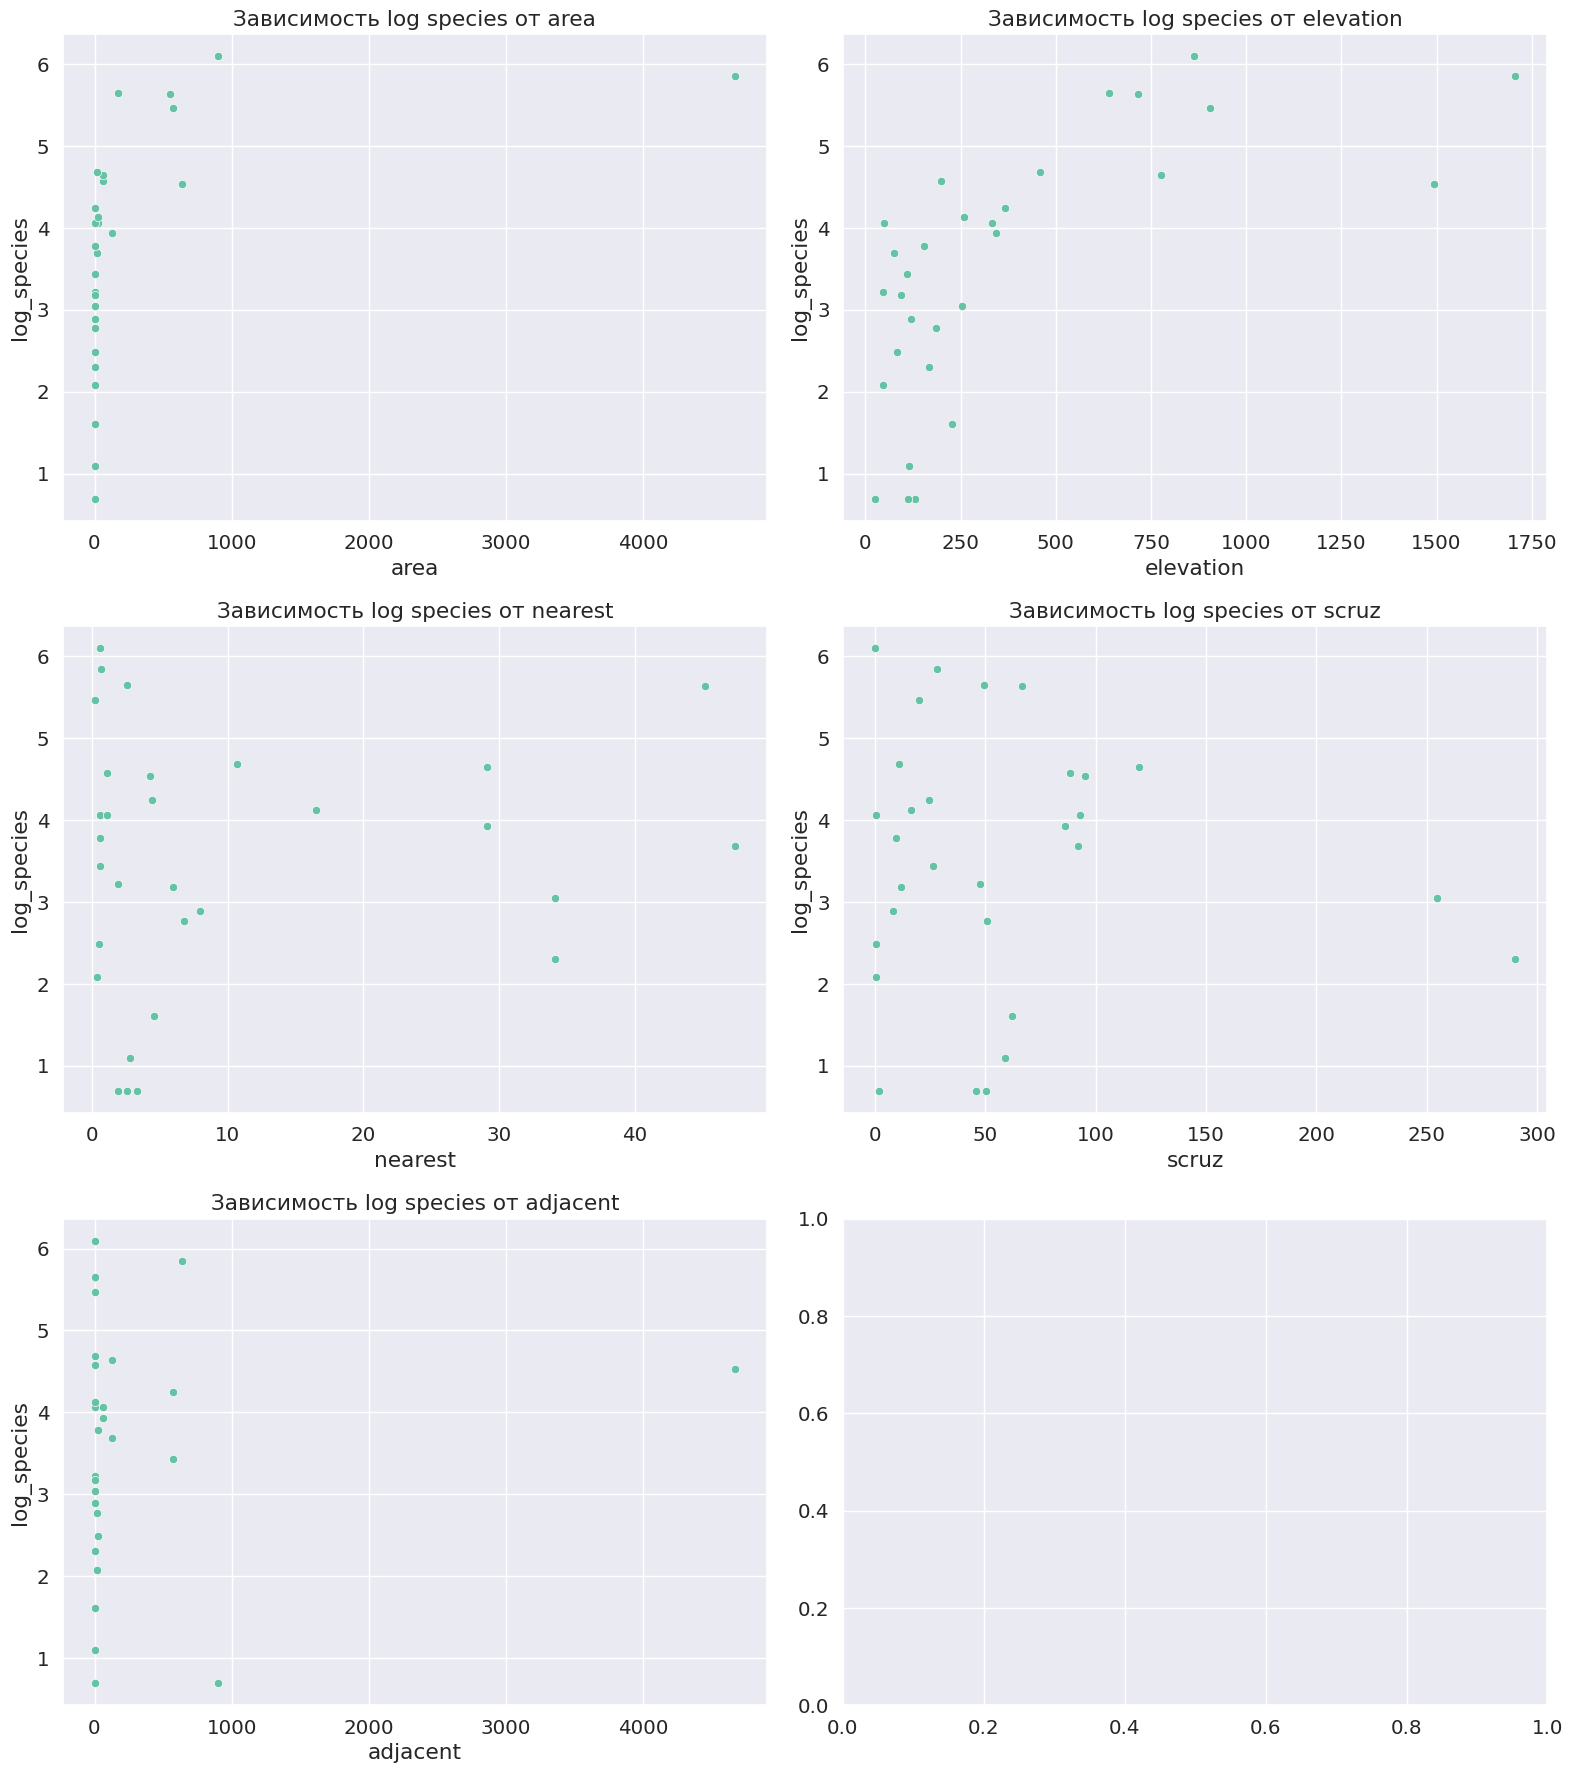

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

features = ["area", "elevation", "nearest", "scruz", "adjacent"]
axes = axes.ravel()

galapagos["log_species"] = np.log(galapagos["species"])

for i, feature in enumerate(features):
    sns.scatterplot(data=galapagos, x=feature, y="log_species", ax=axes[i])
    axes[i].set_title(f"Зависимость log species от {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("log_species")

plt.tight_layout()
plt.show()

Если добавить логарифмирование признака

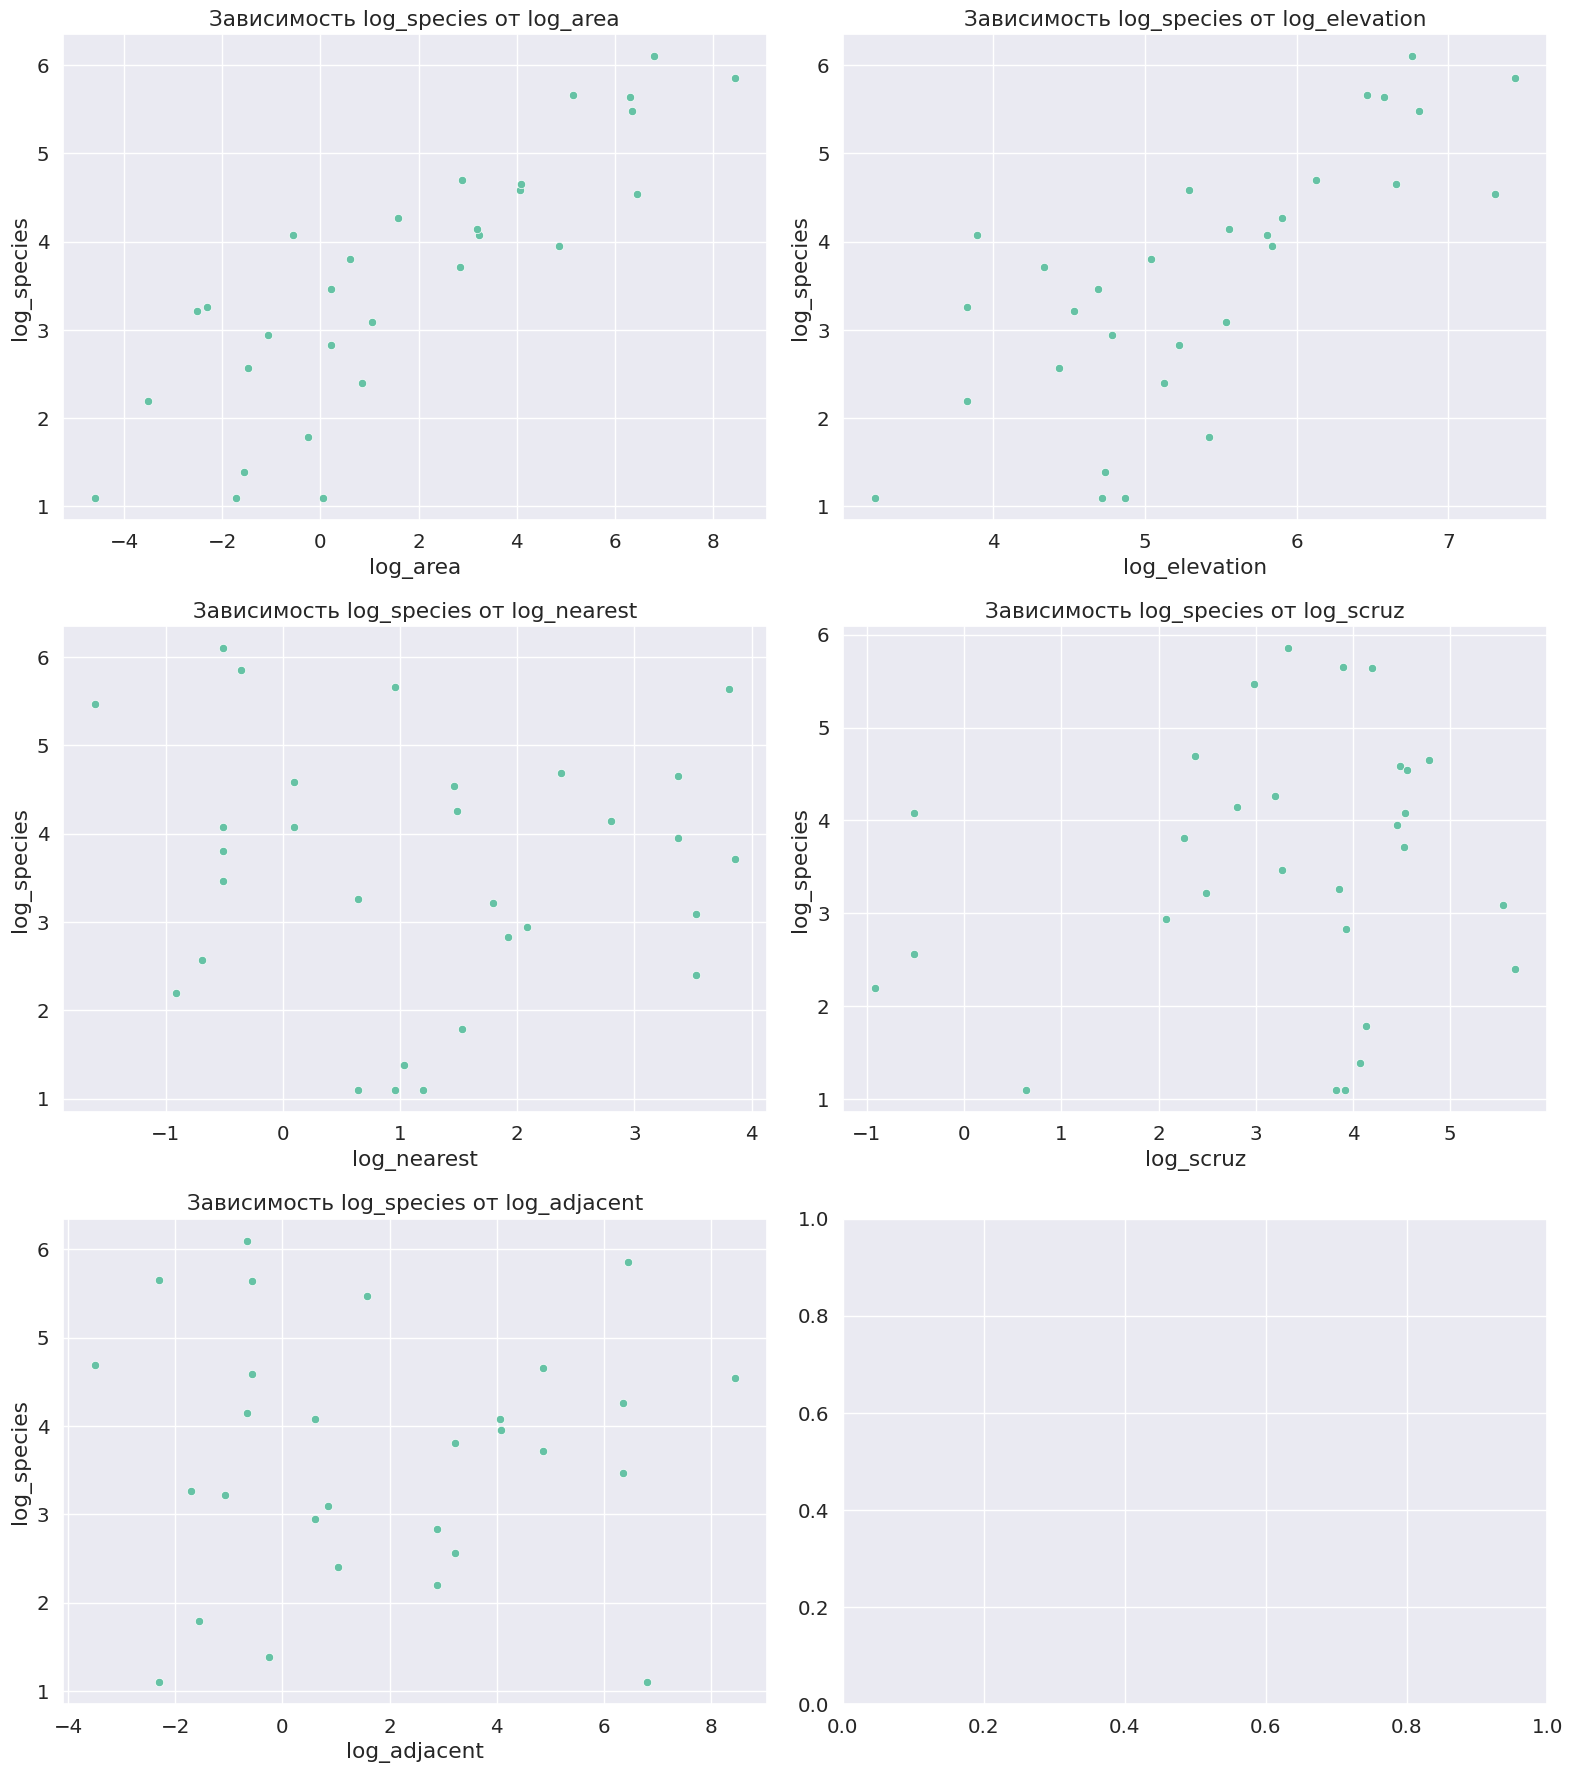

In [6]:
log_transform_features = ["area", "elevation", "nearest", "scruz", "adjacent"]

for feature in log_transform_features:
    galapagos[f"log_{feature}"] = \
    np.log(galapagos[feature])

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
features = ["area", "elevation", "nearest", "scruz", "adjacent"]
axes = axes.ravel()

galapagos["log_species"] = np.log(galapagos["species"] + 1)

for i, feature in enumerate(features):
    x_feature = f"log_{feature}" if f"log_{feature}" \
    in galapagos.columns else feature
    
    sns.scatterplot(data=galapagos, x=x_feature, y="log_species", ax=axes[i])
    axes[i].set_title(f"Зависимость log_species от {x_feature}")
    axes[i].set_xlabel(x_feature)
    axes[i].set_ylabel("log_species")

plt.tight_layout()
plt.show()

Откуда видно, что стоит логарифмировать следующие признаки:
`area`, `elevation`, `scruz`

Обучите пуассоновскую регрессию по всем признакам. Регрессию можно сделать функцией `glm`, указав конкретный тип семейства как `family = sm.families.Poisson()`. Напечатайте `summary` модели.

Разделим выборку на обучающую и тестовую части

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(galapagos, test_size=0.1, random_state=19)

Обучение модели

In [8]:
log_features = ["log_area", "log_elevation", "log_nearest"]
features = ["scruz", "adjacent"]

X = train[features + log_features]
X = sm.add_constant(X)

y = train["species"]

model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                species   No. Observations:                   27
Model:                            GLM   Df Residuals:                       21
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -277.03
Date:                Tue, 03 Dec 2024   Deviance:                       409.08
Time:                        01:48:50   Pearson chi2:                     415.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.3445      0.308      7.607

Оставьте только значимые признаки, обучите модель еще раз и проинтерпретируйте полученные результаты. Какой смысл имеют коэффициенты модели?

Признак `nearest` незначим судя по p-value. Честно выведем все значимые признаки через МПГ методом Бенджамини-Хохберга для контроля FDR

In [9]:
from statsmodels.stats import multitest

df = results.summary2().tables[1]
p_values = df["P>|z|"].values
corrected_p_values = multitest.multipletests(p_values, method='fdr_bh')[1]
df[corrected_p_values < 0.05].index

Index(['const', 'scruz', 'adjacent', 'log_area', 'log_elevation'], dtype='object')

Итого

In [10]:
features = ["log_area", "log_elevation", "scruz", "adjacent"]

X = train[features]
X = sm.add_constant(X)

y = train["species"]

model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                species   No. Observations:                   27
Model:                            GLM   Df Residuals:                       22
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -277.18
Date:                Tue, 03 Dec 2024   Deviance:                       409.39
Time:                        01:48:50   Pearson chi2:                     418.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.3392      0.308      7.598

Значение коэффициентов:

Константа - базовое значение числа видов $\approx \exp(2)\approx 10$

Остальные - увеличение значение на 1 признака соответствует увеличению числа видов на $\exp(coef) - 1$

При использовании статистических свойств необходимо выполнить проверку предположений модели. Аналогом гомоскедастичности для гауссовской линейной модели в случае пуассоновской регрессии является равенство математического ожидания и дисперсии (это свойство пуассоновского распределения).

Аналогично гауссовской линейной модели можно определить устойчивые оценки дисперсии. Посчитайте и напечатайте ковариационную матрицу оценок коэффициентов модели с помощью функции `cov_params`, рассмотрев тип оценки `HC3`.

In [11]:
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit(cov_type="HC3")

cov_matrix_HC3 = results.cov_params()

cov_matrix_HC3

,const,log_area,log_elevation,scruz,adjacent
const,1.024420,4.078669e-02,-0.196130,1.954489e-04,2.660136e-05
log_area,0.040787,2.978528e-03,-0.008683,1.249602e-05,7.753396e-07
log_elevation,-0.196130,-8.683073e-03,0.038516,-5.556523e-05,-5.376460e-06
scruz,0.000195,1.249602e-05,-0.000056,1.719919e-06,-5.164594e-09
adjacent,0.000027,7.753396e-07,-0.000005,-5.164594e-09,7.052949e-09


Напечатайте таблицу статистических свойств оценок коэффициентов и доверительные интервалы.

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                species   No. Observations:                   27
Model:                            GLM   Df Residuals:                       22
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -277.18
Date:                Tue, 03 Dec 2024   Deviance:                       409.39
Time:                        01:48:50   Pearson chi2:                     418.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.3392      1.012      2.311      0.021       0.355       4.323
log_area          0.2832      0.055      5.190      0.000       0.176       0.390
log_elevation     0.2333      0.196      1.189      0.235      -0.151       0.618
scruz            -0.0031      0.001     -2.360      0.018      -0.006      -0.001
adjacent         -0.0003    8.4e-05     -3.358      0.001      -0.000      -0.000
=================================================================================
"""

Придумайте на Галапагосском архипелаге еще один остров, задайте ему некоторые характеристики и назовите своим именем. Оцените, в каком интервале лежит ожидаемое количество видов растений на этом острове.

*Указание.* Воспользуйтесь функцией <a href="https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.get_prediction.html">get_prediction</a> от `GLMResults`. Данная функция возвращает объект <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.html">`PredictionResults`</a>, у которого можно вызвать метод `conf_int`.

In [13]:
new_island = np.array([[1, 10, 30, 10, 1]])  
# [const (всегда 1), area, elevation, scruz, adjacent]

prediction = results.get_prediction(new_island)
conf_int = prediction.conf_int()[0]

print("Ожидаемое количество видов растений")
print(((round(conf_int[0], 1), (round(conf_int[1], 1)))))

Ожидаемое количество видов растений
(30.5, 1147212713.9)


Оно же

In [14]:
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,187183.016771,832861.210642,30.541399,1.147213e+09


Наконец, предложите способ получения предсказательного интервала для количества растений на вашем острове. Постройте его

Можно построить интервал по стандартной ошибке предсказания

In [15]:
mean_prediction = prediction.predicted_mean[0]

se_obs = prediction.se_mean[0]

lower_bound = mean_prediction - se_obs
upper_bound = mean_prediction + se_obs

print(f"Предсказательное значение: {round(mean_prediction, 1)}")
print(f"Предсказательный интервал: [{round(lower_bound, 1)}, {round(upper_bound, 1)}]")

Предсказательное значение: 187183.0
Предсказательный интервал: [-645678.2, 1020044.2]


**Вывод:**

Следует подбирать модель под задачу и проверять ее корректность в каждом из случаев; с помощь хорошей модели можно сделать точные предсказания

В данной задаче модель имеет параметры (R = 1), а chi2_stat = 418 при 22 степенях свободы - модель очень плохо обучается и из за этого у нее слишком широкие доверительные интервалы. Во-первых из за того, что признаков много, а наблюдений мало (всего 27). Во-вторых, модель не очень подходит - истинная зависимость не такая

---
### Задача P2.

Кардиотокография (КТГ) — непрерывная одновременная регистрация частоты сердечных сокращений плода и
тонуса матки с графическим изображением физиологических сигналов на калибровочной ленте. В настоящее
время КТГ является ведущим методом наблюдения за характером сердечной деятельности, который из-за
своей простоты в проведении, информативности и стабильности получаемой информации практически
полностью вытеснил из клинической практики фоно- и электрокардиографию плода.

Для облегчения задачи диагностики, результаты кардиотокографии некоторых эмбрионов были
классифицированы специалистами на нормальные и патологические. По показаниям приборов было
сгенерировано некоторое количество признаков.

**1.** Скачайте данные по ссылке: https://archive.ics.uci.edu/ml/datasets/cardiotocography.
Данные расположены в листе `Data`. Рассматриваемые нами признаки указаны в листе Description в колонке Features. Целевой меткой является столбец `NSP`. Для анализа мы не будем рассматривать данные, целевой меткой которой является `Suspect`.

In [16]:
from ucimlrepo import fetch_ucirepo 
  
cardiotocography = fetch_ucirepo(id=193) 
  
X = pd.DataFrame(cardiotocography.data.features)
y = pd.DataFrame(cardiotocography.data.targets)

print(cardiotocography.variables) 

        name     role        type demographic description units missing_values
0         LB  Feature     Integer        None        None  None             no
1         AC  Feature  Continuous        None        None  None             no
2         FM  Feature  Continuous        None        None  None             no
3         UC  Feature  Continuous        None        None  None             no
4         DL  Feature  Continuous        None        None  None             no
5         DS  Feature  Continuous        None        None  None             no
6         DP  Feature  Continuous        None        None  None             no
7       ASTV  Feature     Integer        None        None  None             no
8       MSTV  Feature  Continuous        None        None  None             no
9       ALTV  Feature     Integer        None        None  None             no
10      MLTV  Feature  Continuous        None        None  None             no
11     Width  Feature     Integer        None       

Выкинем `Class` и лишнюю метку `NSP` - теперь у нас два класса таргетных

In [17]:
y = y.drop(columns=['CLASS'])

data = pd.concat([X, y], axis=1)
data = data[data['NSP'] != 2]

data['NSP'] = data['NSP'].replace({1: 0, 3: 1})

X = data.iloc[:, :-1]
y = data['NSP']
pd.concat([X.head(5), y.head(5)], axis=1)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,132,0.006,0.0,0.006,0.003,0.0,0.000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,133,0.003,0.0,0.008,0.003,0.0,0.000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,134,0.003,0.0,0.008,0.003,0.0,0.000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,132,0.007,0.0,0.008,0.000,0.0,0.000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0
5,134,0.001,0.0,0.010,0.009,0.0,0.002,26,5.9,0,...,50,200,5,3,76,107,107,170,0,1


**2.** Проведите визуальный анализ данных. Какие признаки лучше всего разделяют классы?

В данных много выбросов, судя из boxplot

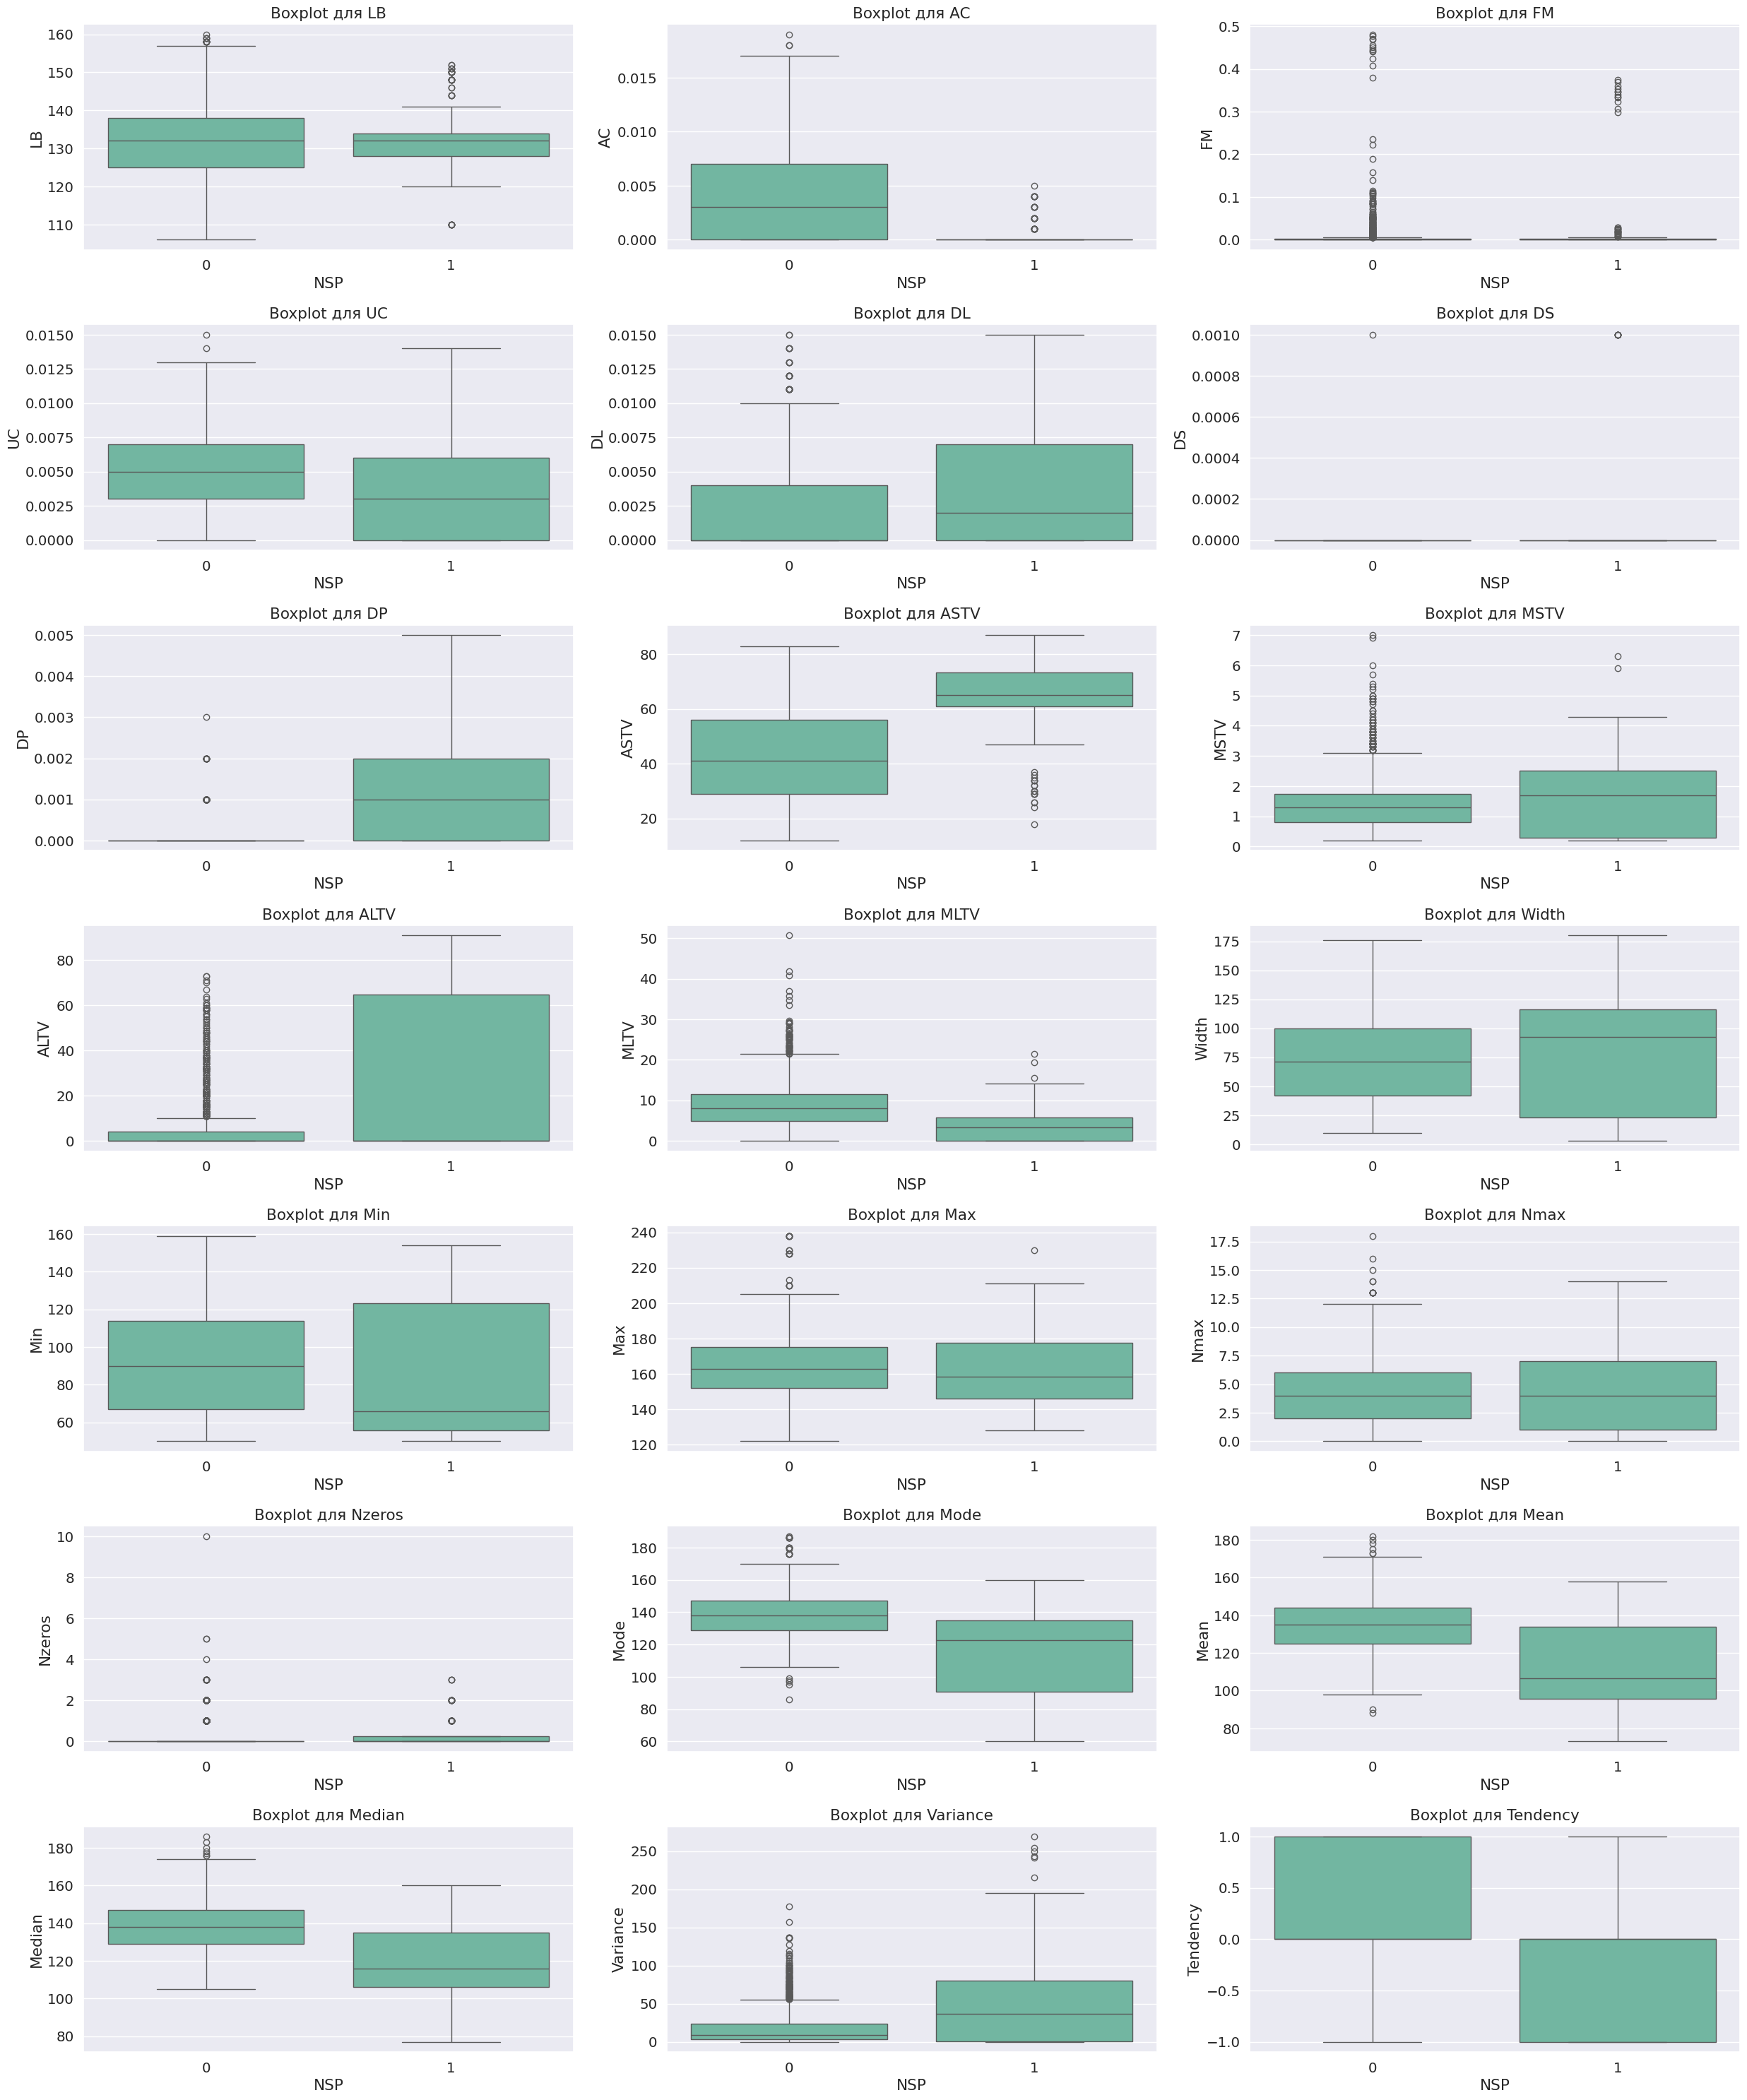

In [18]:
plt.figure(figsize=(25, 30))
for i, col in enumerate(X.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(data=data, x='NSP', y=col)
    plt.title(f'Boxplot для {col}')
plt.tight_layout()
plt.show()

Построим гистограммы без выбросов. Сначала функция фильтрации (берем IQR с чуть запасом)

In [19]:
def remove_outliers_by_target(data, target_column):
    filtered_data = pd.DataFrame()
    for target in data[target_column].unique():
        target_data = data[data[target_column] == target]
        Q1 = target_data.quantile(0.25)
        Q3 = target_data.quantile(0.75)
        IQR = (Q3 - Q1) * 0.5
        target_filtered = target_data[~((target_data < (Q1 - 1.5 * IQR)) | (target_data > (Q3 + 1.5 * IQR))).any(axis=1)]
        filtered_data = pd.concat([filtered_data, target_filtered])
    return filtered_data

Посмотрим на данные

In [20]:
data_without_outliers = remove_outliers_by_target(data, 'NSP')
X_without = data_without_outliers.iloc[:, :-1]
y_without = data_without_outliers['NSP']

print(f"Размер данных до удаления выбросов: {X.shape}")
print(f"Размер данных после удаления выбросов: {X_without.shape}")

Размер данных до удаления выбросов: (1831, 21)
Размер данных после удаления выбросов: (468, 21)


Гистограммы (нормализуем по каждому из классов, ведь они несбалансированы)

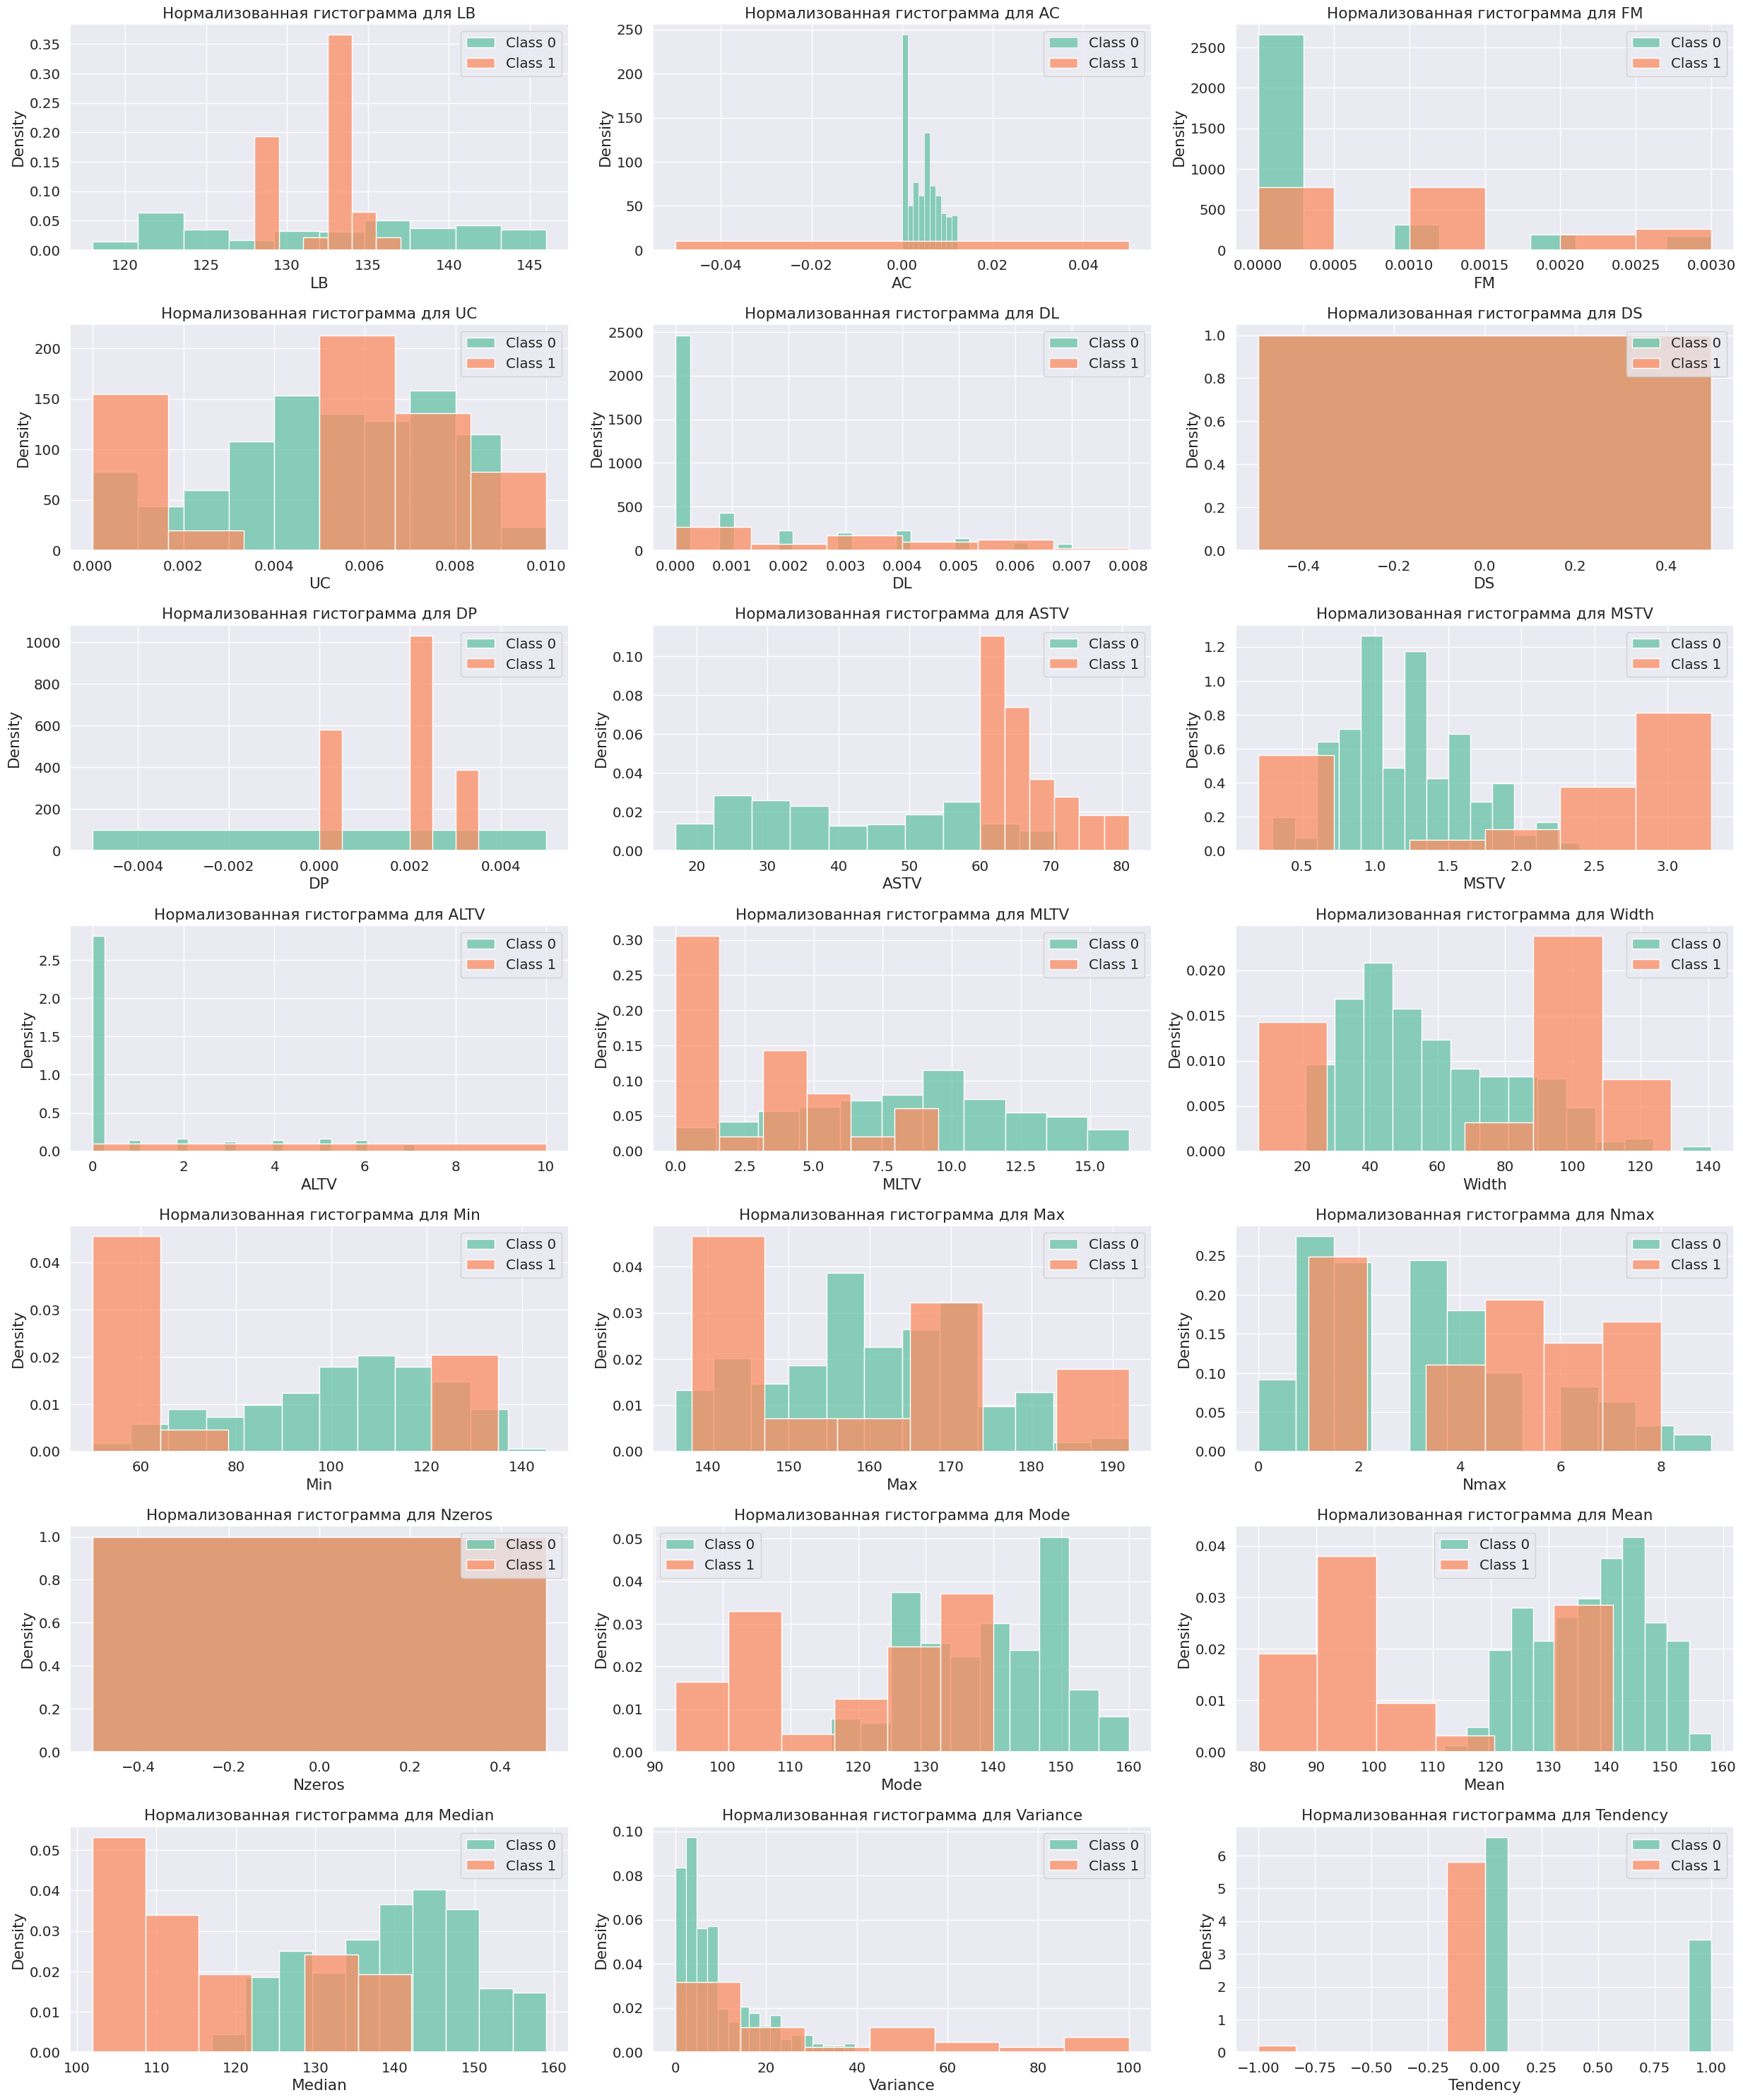

In [21]:
plt.figure(figsize=(25, 30))

i = 1
for col in X_without.columns:
    plt.subplot(7, 3, i)

    if col == 'AC':
        xlim = (-0.05, 0.05)
    elif col == 'DP':
        xlim = (-0.005, 0.005)
    elif col == 'ALTV':
        xlim = (0, 10)
    elif col == 'Variance':
        xlim = (0, 100)
    else:
        xlim = None
    
    for label in y_without.unique():
        class_data = X_without[y_without == label]
        sns.histplot(class_data[col], stat='density',
                     kde=False, label=f'Class {label}',
                     binrange=xlim)
    
    plt.title(f'Нормализованная гистограмма для {col}')
    plt.legend()
    i += 1

plt.tight_layout()

**Какие признаки лучше всего разделяют классы:**
AC, LB, ASTV, MSTV, Width, Median, Variance, Tendency. Так чтобы один класс принимал одни значения, а другой - другие - такого нету.

Для части признаков есть выбросы

**3.** Разделите выборку на обучающую и тестовую часть случайным образом в соотношении 4:1.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

**4.** Обучите логистическую регрессию по всем признакам. Напечатайте `summary` модели.
В чем причины такого поведения модели? Какие выводы можно сделать? Что нужно сделать, чтобы это исправить?

In [23]:
X_train = sm.add_constant(X_train)

model = sm.GLM(y_train, X_train,
                   family=sm.families.Binomial())
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NSP   No. Observations:                 1464
Model:                            GLM   Df Residuals:                     1443
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44.073
Date:                Tue, 03 Dec 2024   Deviance:                       88.146
Time:                        01:49:51   Pearson chi2:                     144.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.4450
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.7499      8.419     -3.534      0.000     -46.251     -13.248
LB             0.5035      0.127      3.960      0.000       0.254       0.753
AC          -715.8149    475.715     -1.505      0.132   -1648.200     216.570
FM            19.8056     11.040      1.794      0.073      -1.833      41.444
UC          -544.8985    126.601     -4.304      0.000    -793.033    -296.765
DL            15.5064    186.851      0.083      0.934    -350.715     381.728
DS         -5037.7856   5.26e+04     -0.096      0.924   -1.08e+05    9.81e+04
DP          2611.7747    909.130      2.873      0.004     829.913    4393.636
ASTV           0.2199      0.042      5.221      0.000       0.137       0.302
MSTV          -1.5961      0.929     -1.718      0.086      -3.417       0.224
ALTV           0.1078      0.021      5.073      0.000       0.066       0.149
MLTV           0.1788      0.106      1.693      0.090      -0.028       0.386
Width          0.0266      0.010      2.540      0.011       0.006       0.047
Min            0.0547      0.021      2.634      0.008       0.014       0.095
Max            0.0813      0.023      3.600      0.000       0.037       0.126
Nmax          -0.5604      0.254     -2.202      0.028      -1.059      -0.062
Nzeros         1.1888      0.376      3.162      0.002       0.452       1.926
Mode          -0.0570      0.077     -0.736      0.462      -0.209       0.095
Mean          -0.0616      0.078     -0.790      0.430      -0.215       0.091
Median        -0.4381      0.136     -3.224      0.001      -0.704      -0.172
Variance       0.0816      0.021      3.901      0.000       0.041       0.123
Tendency       1.6997      0.784      2.168      0.030       0.163       3.236
==============================================================================
"""

Построим ROC кривую

<Figure size 1500x900 with 0 Axes>

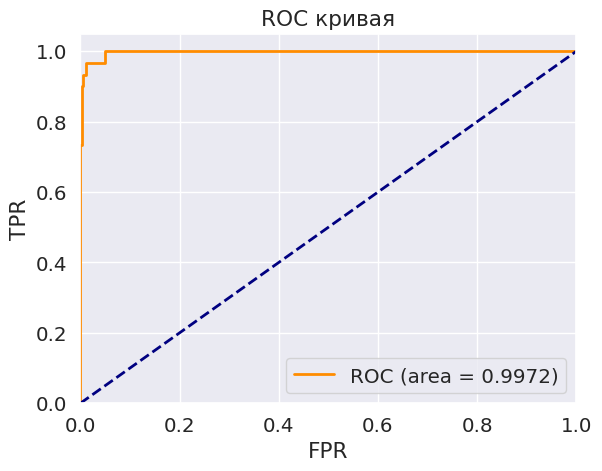

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 9))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC кривая')
plt.legend(loc='lower right')
plt.show()

На графиках видно что в данных есть выбросы, возможна мультиколлинеарность. Но ROC на тесте очень хороший


Выведем все значимые признаки

In [25]:
from statsmodels.stats import multitest

df = result.summary2().tables[1]
p_values = df["P>|z|"].values
corrected_p_values = multitest.multipletests(p_values, method='fdr_bh')[1]
df[corrected_p_values < 0.05].index

Index(['const', 'LB', 'UC', 'DP', 'ASTV', 'ALTV', 'Width', 'Min', 'Max',
       'Nmax', 'Nzeros', 'Median', 'Variance', 'Tendency'],
      dtype='object')

И обучим модель на них

In [26]:
important_features = list(df[corrected_p_values < 0.05].index)
X_train_important = X_train[important_features]

model = sm.GLM(y_train, X_train_important,
                   family=sm.families.Binomial())
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NSP   No. Observations:                 1464
Model:                            GLM   Df Residuals:                     1451
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58.358
Date:                Tue, 03 Dec 2024   Deviance:                       116.72
Time:                        01:49:52   Pearson chi2:                     629.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4340
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.1320      5.154     -4.100      0.000     -31.234     -11.030
LB             0.3629      0.068      5.309      0.000       0.229       0.497
UC          -562.6788    103.303     -5.447      0.000    -765.148    -360.209
DP          2198.8431    483.692      4.546      0.000    1250.824    3146.862
ASTV           0.1704      0.026      6.602      0.000       0.120       0.221
ALTV           0.0859      0.015      5.590      0.000       0.056       0.116
Width          0.0166      0.008      2.068      0.039       0.001       0.032
Min            0.0456      0.018      2.537      0.011       0.010       0.081
Max            0.0622      0.020      3.179      0.001       0.024       0.101
Nmax          -0.3713      0.162     -2.288      0.022      -0.689      -0.053
Nzeros         0.8896      0.279      3.184      0.001       0.342       1.437
Median        -0.4173      0.065     -6.438      0.000      -0.544      -0.290
Variance       0.0466      0.012      3.841      0.000       0.023       0.070
Tendency       1.7109      0.660      2.591      0.010       0.417       3.005
==============================================================================
"""

Итоговая ROC-AUC

<Figure size 1500x900 with 0 Axes>

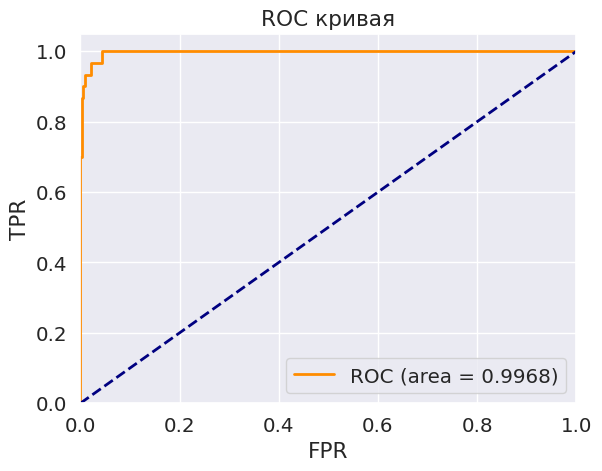

In [27]:
y_pred_prob = result.predict(X_test[important_features])

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 9))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC кривая')
plt.legend(loc='lower right')
plt.show()

Хоть и модель хорошо предсказывает (ROC area = 0.9972 - очень круто), но сама модель плохо подходит к данным и она плохо предсказывает истинные вероятности. То есть предсказания верные, но не корректные в смысле вероятностей

Можно заменять признаки на нелинейные функции от них, тогда возможно появится линейная разделимость в данных и модель станет точнее

**5.** Проверьте модель на линейность по значимым признакам, используя сглаженные диаграммы рассеивания. Для избежания влияния выбросов стройте диаграммы в интервале от 0.05-квантили до 0.95-квантили по значениям каждого признака. В качестве ширины ядра берите треть этого диапазона. Какие выводы можно сделать?

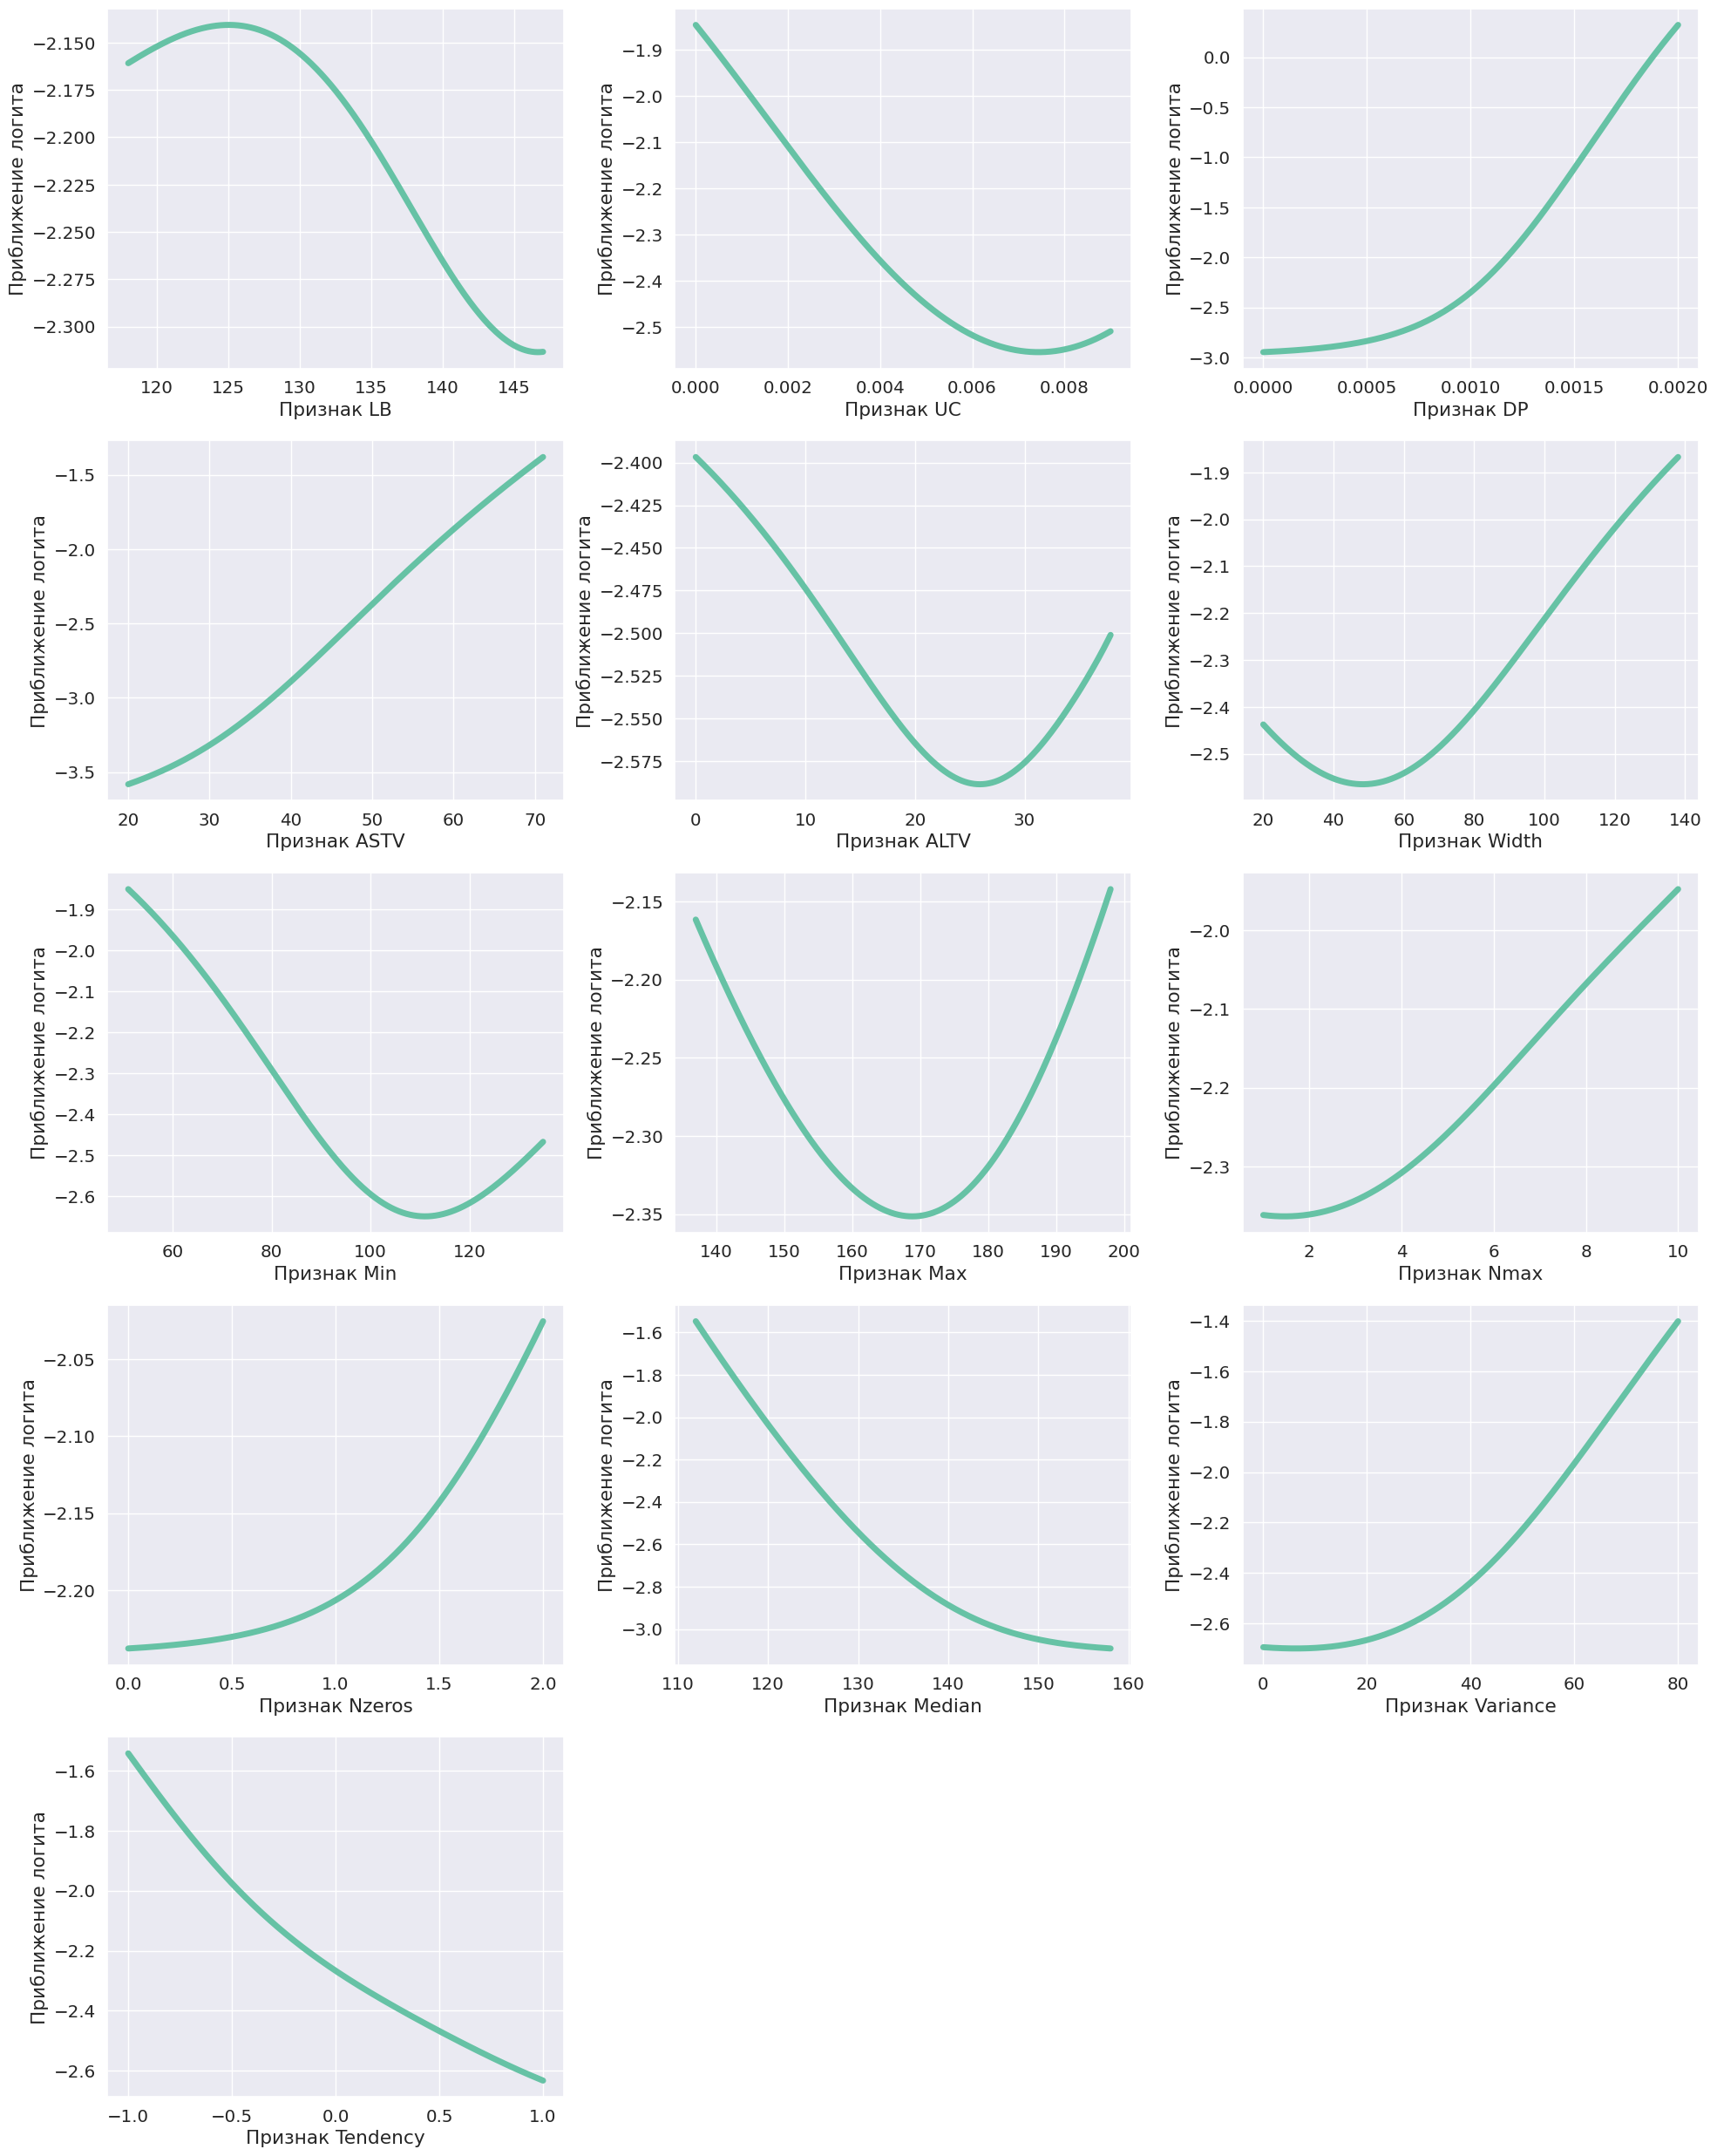

In [28]:
size = 10000 # Размер сетки

X = X_train_important.values
y = y_train.values

plt.figure(figsize=(20, 25))

for feature_idx in range(X.shape[1]):
    if important_features[feature_idx] == 'const': # константный признак
        continue
    lower = np.quantile(X[:, feature_idx], 0.05)
    upper = np.quantile(X[:, feature_idx], 0.95)
    x_grid = np.linspace(
        lower,
        upper,
        size
    )
    
    # Гауссовское ядро
    kernel = sps.norm(scale=(upper - lower)/3)
    
    # Значения ядра в точках выборки
    kernel_values = kernel.pdf(X[:size, feature_idx][:size, np.newaxis]\
                               - x_grid[np.newaxis, :])
    
    # Оценка по ядерной регрессии для признака feature_idx
    y_est = (y[:size, np.newaxis] * kernel_values).sum(axis=0) / kernel_values.sum(axis=0)
    # Приближение логита по оценкам y_est
    l_sm = np.log(y_est / (1 - y_est))
    # Отрисуем графиков
    plt.subplot(5, 3, feature_idx)
    plt.plot(x_grid, l_sm, lw=5)
    plt.xlabel(f'Признак {important_features[feature_idx]}')
    plt.ylabel('Приближение логита')

plt.tight_layout()
plt.show()

На самом деле зависимости нелинейные, это соответсвует соображениям из предыдущего пункта, что линейное приближение неверно

**6.** Можно ли для каких-то из признаков, по которым не подтвердилась линейность модели, добиться линейности с помощью преобразований? В качестве преобразований можно использовать логарифмирование, возведение в квадрат, взятие модуля, сдвиг, введение нескольких признаков и т.д..

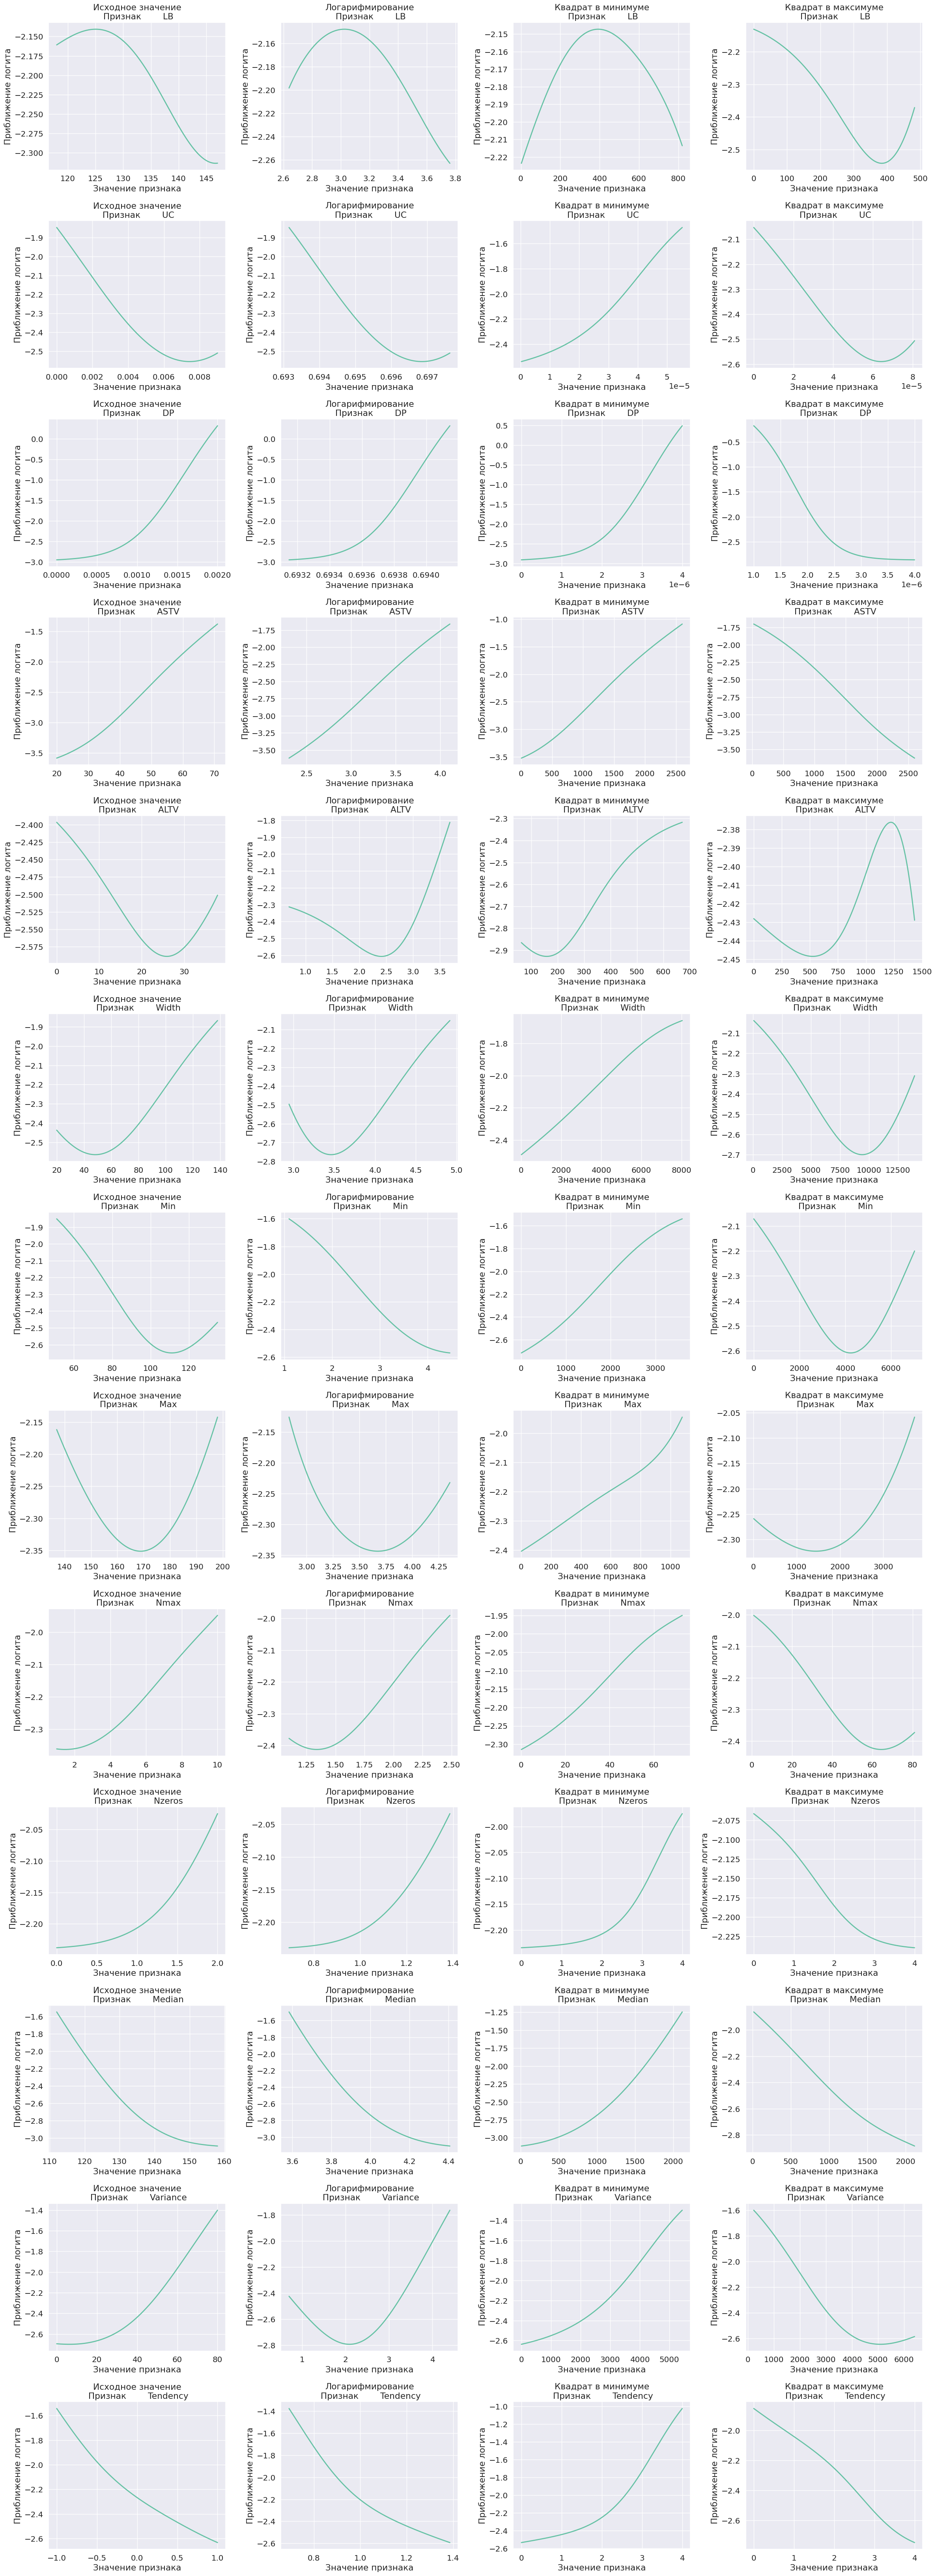

In [29]:
transformations = [
    ("Исходное значение", lambda x: x),
    ("Логарифмирование", lambda x: np.log1p(x - np.min(x) + 1)),
    ("Квадрат в минимуме", lambda x, x_0: (x - x_0)**2),
    ("Квадрат в максимуме", lambda x, x_0: (x - x_0)**2),
]

size = 10000
X = X_train_important.values
y = y_train.values

n_features = X.shape[1]
n_transforms = len(transformations)

plt.figure(figsize=(n_transforms * 6, n_features * 5))
plot_idx = 1

params = {}

for feature_idx in range(n_features):
    if important_features[feature_idx] == 'const':
        continue

    for transform_name, transform in transformations:

        if transform_name == "Квадрат в минимуме":
            transformed_feature = transform(X[:, feature_idx], x_0)
        elif transform_name == "Квадрат в максимуме":
            transformed_feature = transform(X[:, feature_idx], x_1)
        elif transform_name == "Квадрат в максимуме логарифма":
            transformed_feature = transform(X[:, feature_idx], x_2)
        else:
            transformed_feature = transform(X[:, feature_idx])

        lower = np.quantile(transformed_feature, 0.05)
        upper = np.quantile(transformed_feature, 0.95)
        
        x_grid = np.linspace(lower, upper, size)

        kernel = sps.norm(scale=(upper - lower) / 3)

        kernel_values = kernel.pdf(
            transformed_feature[:size, np.newaxis] - x_grid[np.newaxis, :]
        )

        y_est = (y[:size, np.newaxis] * kernel_values).sum(axis=0)\
        / kernel_values.sum(axis=0)
        l_sm = np.log(y_est / (1 - y_est))

        if transform_name == 'Исходное значение':
            x_0 = x_grid[np.argmin(l_sm)]
            x_1 = x_grid[np.argmax(l_sm)]
            if important_features[feature_idx] not in params:
                params[important_features[feature_idx]] = {}
            params[important_features[feature_idx]]['x_0'] = x_0
            params[important_features[feature_idx]]['x_1'] = x_1
        if transform_name == 'Логарифмирование':
            x_2 = x_grid[np.argmax(l_sm)]
            params[important_features[feature_idx]]['x_2'] = x_1
        
        plt.subplot(n_features, n_transforms, plot_idx)
        plt.plot(x_grid, l_sm, lw=2)
        plt.title(f"{transform_name}\n Признак\
        {important_features[feature_idx]}")
        plt.xlabel('Значение признака')
        plt.ylabel('Приближение логита')

        plot_idx += 1

plt.tight_layout()
plt.show()

Итого получится лучшая линеаризация если брать квадрат в минимуме/максимумов логитов

Оставим как есть LB ASTV

Квадрат в максимуме Nzeros Median Tendency

Квадрат в минимуме UC DP ALTV Width Min Max NMax Variance

Осталось в лоб отобрать нужные трансформации

In [30]:
transformations_dict = {
    'LB': {
        'Исходное значение': lambda x: x,
    },
    'UC': {
        'Квадрат в минимуме': lambda x: (x - params['UC']['x_0'])**2,
    },
    'DP': {
        'Квадрат в минимуме': lambda x: (x - params['DP']['x_0'])**2,
    },
    'ASTV': {
        'Исходное значение': lambda x: x,
    },
    'ALTV': {
        'Квадрат в минимуме': lambda x: (x - params['ALTV']['x_0'])**2,
    },
    'Width': {
        'Квадрат в минимуме': lambda x: (x - params['Width']['x_0'])**2,
    },
    'Min': {
        'Квадрат в минимуме': lambda x: (x - params['Min']['x_0'])**2,
    },
    'Max': {
        'Квадрат в максимуме': lambda x: (x - params['Max']['x_1'])**2,
    },
    'Nmax': {
        'Квадрат в максимуме': lambda x: (x - params['Nmax']['x_1'])**2,
    },
    'Nzeros': {
        'Квадрат в максимуме': lambda x: (x - params['Nzeros']['x_1'])**2,
    },
    'Median': {
        'Квадрат в максимуме': lambda x: (x - params['Median']['x_1'])**2,
    },
    'Variance': {
        'Квадрат в минимуме': lambda x: (x - params['Variance']['x_0'])**2,
    },
    'Tendency': {
        'Квадрат в максимуме': lambda x: (x - params['Tendency']['x_1'])**2,
    },
}


**7.** Оставьте только значимые и преобразованные признаки, обучите модель еще раз и проинтерпретируйте полученные результаты. Какой смысл имеют коэффициенты модели?

In [31]:
important_features = list(df[corrected_p_values < 0.05].index)
X_train_important = X_train[important_features]

Применим преобразование

In [33]:
important_features = list(df[corrected_p_values < 0.05].index)
X_train_important = X_train[important_features]

for feature in important_features:
    if feature in transformations_dict:
        transform = transformations_dict[feature]
        for transform_name, func in transform.items():
            if feature != 'LB':
                new_feature_name = f"{feature}_{transform_name}"
                X_train_important[new_feature_name] = func(X_train_important[feature])


Итого

In [34]:
model = sm.GLM(y_train, X_train_important,
                   family=sm.families.Binomial())
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NSP   No. Observations:                 1464
Model:                            GLM   Df Residuals:                     1440
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27.493
Date:                Tue, 03 Dec 2024   Deviance:                       54.986
Time:                        01:50:54   Pearson chi2:                     118.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -63.9208     31.484     -2.030      0.042    -125.628      -2.213
LB                               0.5781      0.183      3.164      0.002       0.220       0.936
UC                            -804.1014    269.537     -2.983      0.003   -1332.384    -275.818
DP                            2654.1563   2187.054      1.214      0.225   -1632.390    6940.702
ASTV                             0.1580      0.033      4.734      0.000       0.093       0.223
ALTV                             0.1057      0.042      2.540      0.011       0.024       0.187
Width                            0.0338      0.047      0.713      0.476      -0.059       0.127
Min                              0.1451      0.058      2.484      0.013       0.031       0.260
Max                              0.2299      0.101      2.272      0.023       0.032       0.428
Nmax                             0.3813      0.272      1.401      0.161      -0.152       0.915
Nzeros                           2.5296      0.785      3.224      0.001       0.992       4.068
Median                          -0.8103      0.210     -3.862      0.000      -1.222      -0.399
Variance                         0.0261      0.054      0.483      0.629      -0.080       0.132
Tendency                        -0.8972      2.279     -0.394      0.694      -5.364       3.569
UC_Квадрат в минимуме         4.279e+04   2.96e+04      1.444      0.149   -1.53e+04    1.01e+05
DP_Квадрат в минимуме         7.579e+05   8.08e+05      0.938      0.348   -8.25e+05    2.34e+06
ASTV_Исходное значение           0.1663      0.035      4.751      0.000       0.098       0.235
ALTV_Квадрат в минимуме          0.0054      0.002      2.913      0.004       0.002       0.009
Width_Квадрат в минимуме        -0.0015      0.001     -2.596      0.009      -0.003      -0.000
Min_Квадрат в минимуме           0.0037      0.001      2.842      0.004       0.001       0.006
Max_Квадрат в максимуме         -0.0020      0.002     -1.060      0.289      -0.006       0.002
Nmax_Квадрат в максимуме         0.1964      0.062      3.164      0.002       0.075       0.318
Nzeros_Квадрат в максимуме      -0.0891      0.162     -0.550      0.583      -0.407       0.229
Median_Квадрат в максимуме      -0.0021      0.002     -0.863      0.388      -0.007       0.003
Variance_Квадрат в минимуме      0.0002      0.001      0.414      0.679      -0.001       0.001
Tendency_Квадрат в максимуме     2.3048      1.149      2.006      0.045       0.053       4.557
================================================================================================
"""

Теперь коэффициенты изменились, потому что это зависимость уже от трансформированных величин. Далее, Log-Likelihood увеличился и Deviance уменьшился (лучше, чем у модели со всеми признаками) -> введеные признаки сильно помогли

**8.** Для некоторых объектов из тестовой выборки оцените вероятность наличия патологии. Постройте также доверительный интервал уровня доверия 0.95 для этой вероятности.

*Указание.* Воспользуйтесь функцией <a href="https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.get_prediction.html">get_prediction</a> от `GLMResults`. Данная функция возвращает объект <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.html">`PredictionResults`</a>, у которого можно вызвать метод `conf_int`.

Проинтерпретируйте границы полученных доверительных интервалов. Как их можно использовать в медицине?

Преобразуем тестовую выборку

In [37]:
X_test_important = X_test[important_features]

for feature in important_features:
    if feature in transformations_dict:
        transform = transformations_dict[feature]
        for transform_name, func in transform.items():
            if feature != 'LB':
                new_feature_name = f"{feature}_{transform_name}"
                X_test_important[new_feature_name] = func(X_test_important[feature])


Для первых двух пациентов

In [38]:
X_test_important.head(2)

,const,LB,UC,DP,ASTV,ALTV,Width,Min,Max,Nmax,...,ASTV_Исходное значение,ALTV_Квадрат в минимуме,Width_Квадрат в минимуме,Min_Квадрат в минимуме,Max_Квадрат в максимуме,Nmax_Квадрат в максимуме,Nzeros_Квадрат в максимуме,Median_Квадрат в максимуме,Variance_Квадрат в минимуме,Tendency_Квадрат в максимуме
324,1.0,135,0.000,0.0,62,71,97,71,168,3,...,62,2032.342828,2368.317900,1599.383198,900.0,49.0,4.0,1024.0,27.716292,4.0
1579,1.0,132,0.005,0.0,25,0,99,54,153,6,...,25,671.767961,2566.979366,3248.121032,2025.0,16.0,4.0,441.0,769.250945,4.0


Посчитаем предсказания

In [39]:
predictions = result.get_prediction(X_test_important.head(2))

predicted_probs = predictions.predicted_mean

conf_int = predictions.conf_int(alpha=0.05)

predicted_probs_rounded = predicted_probs.round(4)
conf_int_rounded = conf_int.round(4)

print("Предсказанная вероятность:", predicted_probs_rounded)
print("Доверительный интервал (95%):")
print(conf_int_rounded)

Предсказанная вероятность: [0.9996 0.    ]
Доверительный интервал (95%):
[[0.749 1.   ]
 [0.    0.   ]]


**Вывод:**

Модель имеет не самые хорошие показатели R^2 и log likehood из-за выбросов

Первый пациент скорее больной, а второй нет, причем с большой уверенностью.

Причем доверительный интервал показывает уверенность в том, насколько предсказание верное - например в данном случая левая граница 75% уже довольно существенная. Для медицины это означает, что предсказание нужно будет перепроверить. Аналогичная ситуация будет если например правая граница ДИ будет довольно высокой - вдруг тогда мы получили ложноотрицательное значение. Так, нужно аккуратно работать с порогом предсказания / шириной ДИ

Так же в медицине может быть важно чтобы эти вероятности были истинными - тогда сама модель должна достаточно корректно предсказывать вероятности - это проверяем по R^2 и log likehood - в нашем случае это не совсем так.

### 

---
### Задача P3.

Вам выдается сводная статистика о посетителях сайта miptstats.github.io за период с февраля по май этого года. В каждой ячейке таблицы записано количество посетителей определенного условия, которые хотя бы раз посетили сайт. Пол посетителя определяется технологией Яндекс.Метрики.

In [40]:
data = pd.DataFrame(
    {
        'Мужской': [3422, 1299, 367, 363, 61, 30],
        'Женский': [1303, 510, 189, 122, 28, 5]
    },
    index=[
        'Chrome', 'Яндекс Браузер', 'Edge', 'Opera', 'Safari', 'Firefox'
    ]
)
data

,Мужской,Женский
Chrome,3422,1303
Яндекс Браузер,1299,510
Edge,367,189
Opera,363,122
Safari,61,28
Firefox,30,5


Проверьте гипотезу о том, что тип используемого браузера не зависит от пола посетителя. Сделайте вывод.

Будем применять критерий хи-квадрат. Подадим таблицу как есть, и проверим применимость. Доля клеток, в которых ожидаемое количество меньше 5 получилась меньше 20%, поэтому не надо делать объединения клеток.

In [41]:
chi2, p, dof, expected = sps.chi2_contingency(data)
(expected < 5).mean()

0.0

Значение статистики и pvalue, **наблюдается статистически значимая зависимость**

In [42]:
round(chi2, 1), round(p, 4)

(16.1, 0.0066)

p-value = 0.0066 меньше стандартного уровня значимости 0.05, что означает, что у нас есть достаточные доказательства для отклонения нулевой гипотезы. Это означает, что тип используемого браузера зависит от пола посетителя

Посчитаем коэффициент Крамера. Сначала функция

In [43]:
def cramer(chi2, n, k1, k2):
    """
    Коэффициент Крамера, считающийся по статистике критерия хи-квадрат
    
    :param chi2: Статистика критерия хи-квадрат
    :param n: Размер выборки
    :param k1: Количество различных значений первой выборки
    :param k2: Количество различных значений второй выборки
    
    :returns: Коэффициент корреляции Крамера
    """
    
    return np.sqrt(chi2 / (n * min(k1, k2) - 1))

Рассчет

In [44]:
round(cramer(chi2, data.sum().sum(), data.shape[0] , data.shape[1]), 4)

0.0323

То есть зависимость на самом деле слабая

Итого: зависимость есть, но слабая

---
### Задача P4.

Скачайте <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing">данные</a> маркетинговых кампаний португальского банковского учреждения. Цель задачи &mdash; с целью дальнейшего исследования понять, какие условия (среди 20 признаков) влияют на подписание клиентом срочного депозита (величина $y$). Выполните задачу двумя способами:

* методами анализа зависимостей, выяснив, какие характеристики клиента оказывают влияние на целевую переменную, и указав степень влияния;

* вычислив важность признаков, полученной с помощью Random Forest, разбив предварительно данные на обучающую и тестовую части.

Проинтерпретируйте полученные результаты.

*Напоминание*: в случае отбора признаков с целью дальнейшего исследования можно применять методы, контролирующие FDR на уровне не более 0.1.

In [45]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Типы столбцов

In [46]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Анализ зависимостей:**

Для категориальных признаков:

Хи-квадрат (и важность тогда это коэффициент Крамера)

Для числовых:

Коэффициент корреляции Кэндалла

Мы не умеем сравнивать между собой коэффициент Крамера и к.к. Кэндала напрямую, поэтому по важности сравнивать мы можем только признаки из одной группы. Если мы захотим отобрать только важные признаки - то будем делать это в каждой группе отдельно. 

Мы теряем в универсальности, но выигрываем в точности - категориальные признаки типа строки `job` сложно переводить в вещественное число (причем единственное - если мы хотим на важность именно признака `job` посмотреть - т.е. OneHot не подойдет) без потери точности анализа. Размен выглядит оправданным

Сначала хи квадрат

In [47]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

categorical_columns = bank.select_dtypes(include=['object']).columns
#categorical_columns = categorical_columns.drop('y')

chi2_results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(bank[column], bank['y'])
    chi2, p, _, expected = sps.chi2_contingency(contingency_table)
    
    n = len(bank)
    k1 = len(bank[column].unique())
    k2 = len(bank['y'].unique())
    cramers_v_value = cramer(chi2, n, k1, k2)
    
    chi2_results[column] = {
        'p-value': p,
        'cramer': cramers_v_value
    }

И его корректность (действительно меньше 20%)

In [48]:
(expected < 5).mean()

0.0

Теперь коэффициенты корреляции

In [49]:
numerical_columns = bank.drop(['y'], axis=1).select_dtypes(include=['int64', 'float64']).columns
kendall_results = {}

for col in numerical_columns:
    corr, p_value = sps.kendalltau(bank[col], bank['y'])
    kendall_results[col] = {'correlation': corr, 'p-value': p_value}

Осталось устроить МПГ с контролем FDR -> Бенджамин-Хохберг. Ясно что МПГ надо устраивать для категориальных и вещественных одновременно

In [50]:
from statsmodels.stats.multitest import multipletests

chi2_results_sorted = sorted(chi2_results.items(),
                             key=lambda x: x[1]['p-value'])
kendall_results_sorted = sorted(kendall_results.items(),
                                key=lambda x: x[1]['p-value'])


chi2_p_values = [result['p-value'] for _, result in chi2_results_sorted]

kendall_p_values = [result['p-value'] for _, result in kendall_results_sorted]


all_p_values = chi2_p_values + kendall_p_values

_, corrected_p_values, _, _ = multipletests(all_p_values, alpha=0.1, method='fdr_bh')

corrected_categorical_p_values = corrected_p_values[:len(chi2_p_values)]
corrected_kendall_p_values = corrected_p_values[len(chi2_p_values):]

for i, (feature, result) in enumerate(chi2_results_sorted):
    result['corrected_p-value'] = corrected_categorical_p_values[i]

for i, (feature, result) in enumerate(kendall_results.items()):
    result['corrected_p-value'] = corrected_kendall_p_values[i]

Итого получим если таблицей

In [51]:
print("\nРезультаты теста хи-квадрат с коэффициентом Крамера и скорректированными p-value:")
for feature, result in chi2_results_sorted:
    print(f"{feature.ljust(20)}: p-value = {\
    result['p-value']:.2e},cramer = {result['cramer']:.1e}, corrected p-value = {\
    result['corrected_p-value']:.2e}")

print("\nКорреляция Кенделла числовых признаков с целевой переменной, p-value и скорректированные p-value:")
for feature, result in kendall_results.items():
    print(f"{feature.ljust(20)}: correlation = {\
    result['correlation']:.2f}, p-value = {\
    result['p-value']:.2e}, corrected p-value = {result['corrected_p-value']:.2e}")



Результаты теста хи-квадрат с коэффициентом Крамера и скорректированными p-value:
month               : p-value = 0.00e+00,cramer = 1.9e-01, corrected p-value = 0.00e+00
poutcome            : p-value = 0.00e+00,cramer = 2.3e-01, corrected p-value = 0.00e+00
job                 : p-value = 4.19e-199,cramer = 1.1e-01, corrected p-value = 9.31e-199
contact             : p-value = 1.53e-189,cramer = 1.0e-01, corrected p-value = 3.05e-189
default             : p-value = 5.16e-89,cramer = 7.0e-02, corrected p-value = 8.60e-89
education           : p-value = 3.31e-38,cramer = 4.8e-02, corrected p-value = 4.88e-38
marital             : p-value = 2.07e-26,cramer = 3.9e-02, corrected p-value = 2.76e-26
day_of_week         : p-value = 2.96e-05,cramer = 1.8e-02, corrected p-value = 3.48e-05
housing             : p-value = 5.83e-02,cramer = 8.3e-03, corrected p-value = 6.14e-02
loan                : p-value = 5.79e-01,cramer = 3.6e-03, corrected p-value = 5.79e-01

Корреляция Кенделла числовых при

Визуализация

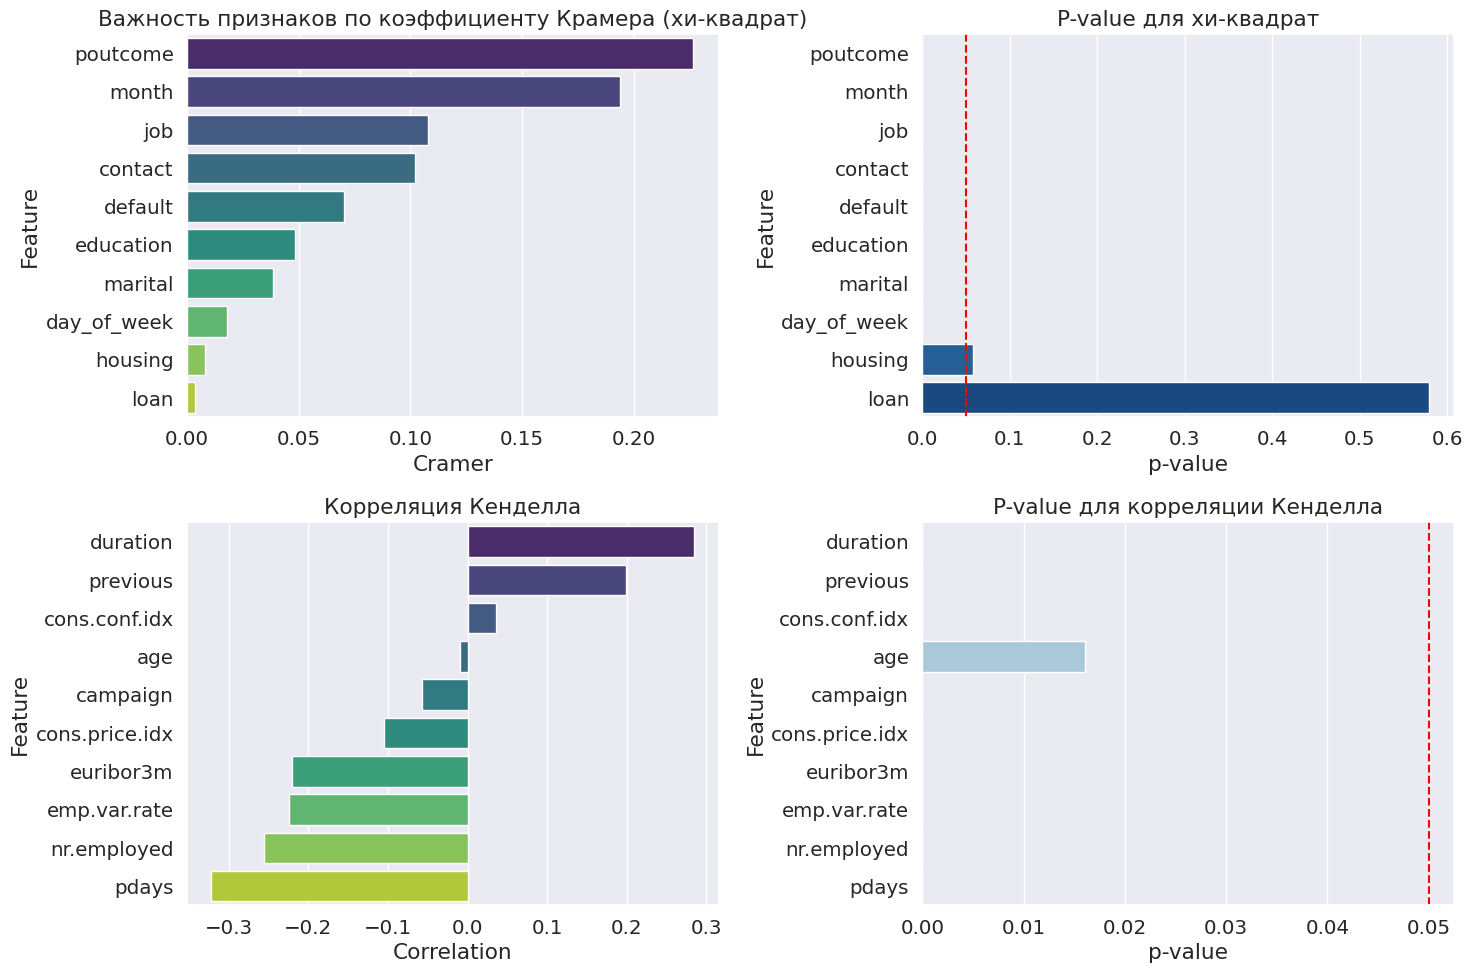

In [52]:
chi2_results_sorted_df = pd.DataFrame({
    'Feature': [feature for feature, _ in chi2_results_sorted],
    'Cramer': [result['cramer'] for _, result in chi2_results_sorted],
    'p-value': [result['p-value'] for _, result in chi2_results_sorted],
    'corrected_p-value': corrected_categorical_p_values
})

kendall_results_df = pd.DataFrame({
    'Feature': [feature for feature, _ in kendall_results_sorted],
    'Correlation': [result['correlation'] for _, result in kendall_results_sorted],
    'p-value': [result['p-value'] for _, result in kendall_results_sorted],
    'corrected_p-value': corrected_kendall_p_values
})

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(data=chi2_results_sorted_df.sort_values('Cramer', ascending=False),
            x='Cramer', y='Feature', palette='viridis')
plt.title('Важность признаков по коэффициенту Крамера (хи-квадрат)')

plt.subplot(2, 2, 2)
sns.barplot(data=chi2_results_sorted_df.sort_values('Cramer', ascending=False),
            x='p-value', y='Feature', palette='Blues')
plt.axvline(x=0.05, color='red', linestyle='--', label='Порог значимости (0.05)')
plt.title('P-value для хи-квадрат')

plt.subplot(2, 2, 3)
sns.barplot(data=kendall_results_df.sort_values('Correlation', ascending=False),
            x='Correlation', y='Feature', palette='viridis')
plt.title('Корреляция Кенделла')

plt.subplot(2, 2, 4)
sns.barplot(data=kendall_results_df.sort_values('Correlation', ascending=False),
            x='p-value', y='Feature', palette='Blues')
plt.axvline(x=0.05, color='red', linestyle='--', label='Порог значимости (0.05)')
plt.title('P-value для корреляции Кенделла')

plt.tight_layout()
plt.show()

С помощью Random Forest:

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

bank = pd.read_csv('bank-additional-full.csv', sep=';')

y = bank['y'].map({'yes': 1, 'no': 0})

bank_encoded = pd.get_dummies(bank.drop(columns=['y']), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(bank_encoded,
                                                    y, test_size=0.2,
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf.fit(X_train_scaled, y_train)

feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

Просуммируем Importance для каждой из групп

In [54]:
grouped_importance = importance_df.copy()
grouped_importance['Original Feature'] = grouped_importance['Feature'].apply(lambda x: x.split('_')[0])

summed_importance = grouped_importance.groupby('Original Feature')['Importance'].sum().reset_index()

summed_importance = summed_importance.sort_values(by='Importance', ascending=False)

Теперь визуализация

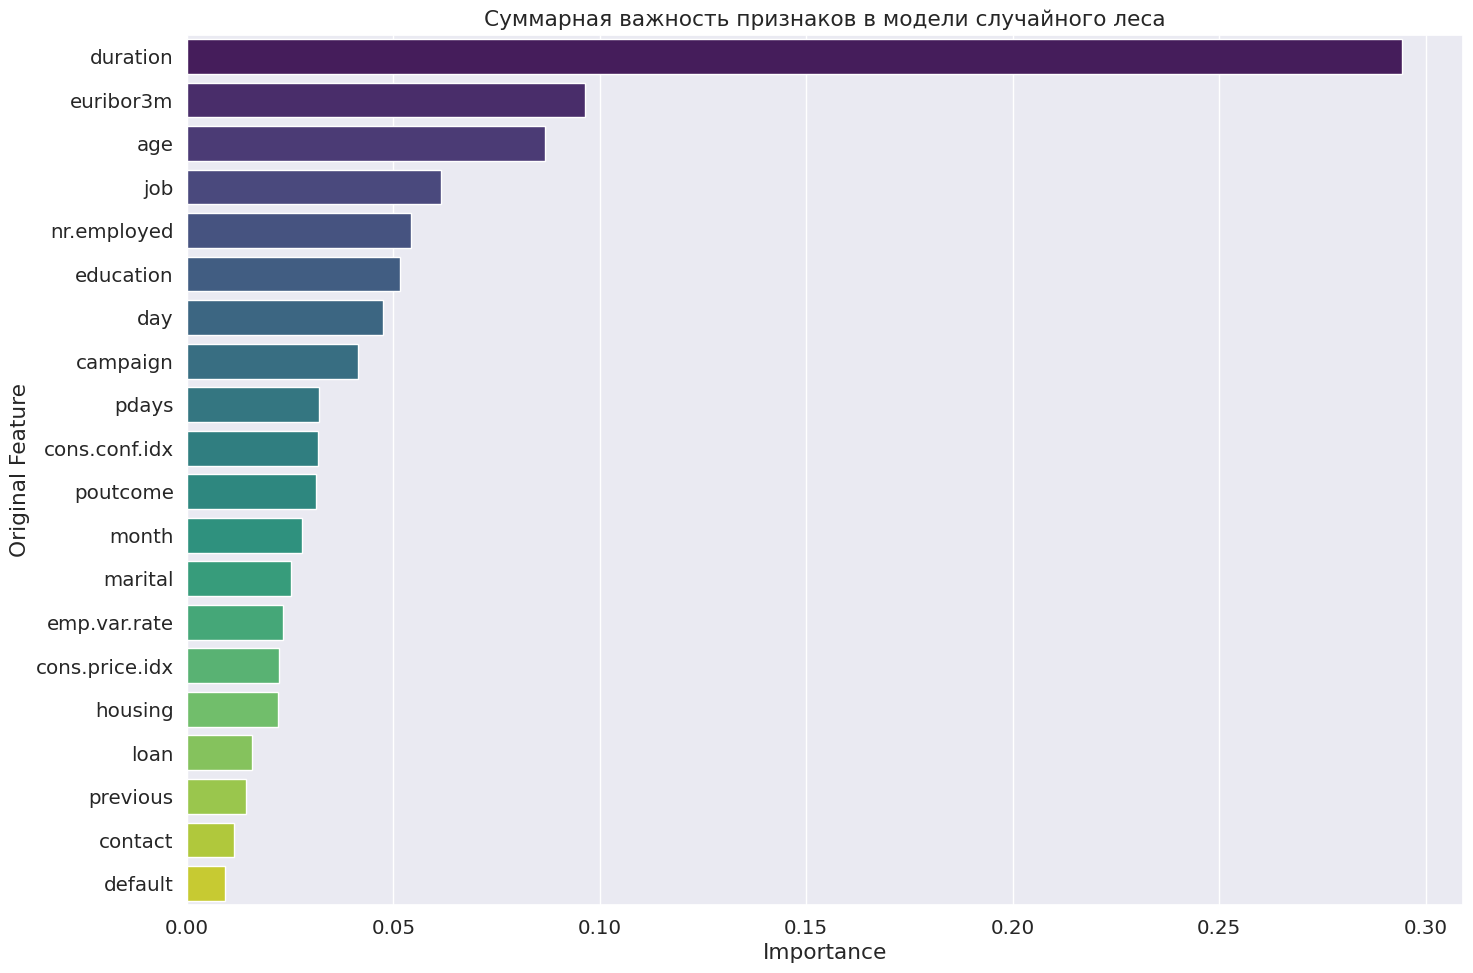

In [55]:
plt.figure(figsize=(15, 10))

sns.barplot(data=summed_importance,
            x='Importance', y='Original Feature', palette='viridis')
plt.title('Суммарная важность признаков в модели случайного леса')

plt.tight_layout()
plt.show()


В целом результаты схожи, но есть и различия, например, duration для леса оказывается очень важным, а его корреляция не сильно больше, чем у других признаков. Похоже, что лес нашел нелинейную зависимость, и она оказалось важной.

Importance для моделей это важность признака для предсказания модели, она не всегда совпадает с истинной важностью признака для целевой переменной, однако является хорошим приближением, и скоррелирована с ней.

Коэффициент корреляции способен же охватывать в первую очередь только линейные зависимости, поэтому он может в части случаев оказаться менее точным. Однако первый метод еще дает статистическую оценку значимости результата.

В целом оба метода дают полезную информацию о том, какие признаки наиболее влияют на предсказания модели и как эти признаки связаны с целевой переменной.